In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/15/Результаты симуляций/df_october')

In [ ]:
df = df.drop(columns = ['Unnamed: 0.1', 'Unnamed: 0'], axis = 1)

**Диапазон 0 (0-1000)**

Уровень значимости 0.05

In [ ]:
pip install pingouin

In [ ]:
import pingouin as pg
import scipy.stats as stats
import statistics
import random

In [ ]:
d0 = df[(df['check_sum'] <= 1000) & (df['check_sum'] > 0)].copy().reset_index() #выделили рассматриваемый диапазон

In [ ]:
d0 = d0[d0['amount'] <= np.quantile(d0['amount'], 0.999)] #избавились от выбросов в чаевых

In [ ]:
d0 = d0[d0['amount'] > 0] #избавились от ошибок в данных

In [ ]:
d0['percent_of_total'] = d0['amount']/d0['check_sum']

Москва, Санкт-Перербург, Регионы

In [ ]:
from statsmodels.stats import oneway
import seaborn as sns

In [ ]:
a1 = d0[d0['region'] == 'Москва']['percent_of_total']
a2 = d0[d0['region'] == 'Санкт-Петербург']['percent_of_total']
a3 = d0[d0['region'] == 'Регионы']['percent_of_total']

Посмотрим на распределение данных

<ipython-input-11-f8f8a147da7a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns_plot = sns.distplot(a1)


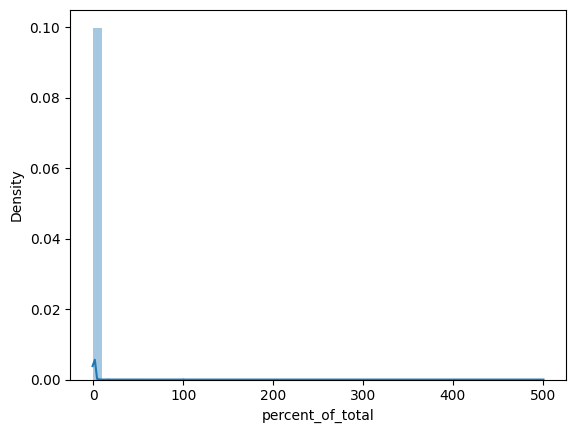

In [ ]:
sns_plot = sns.distplot(a1)
fig = sns_plot.get_figure()

<ipython-input-12-037438bdaea9>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns_plot = sns.distplot(a2)


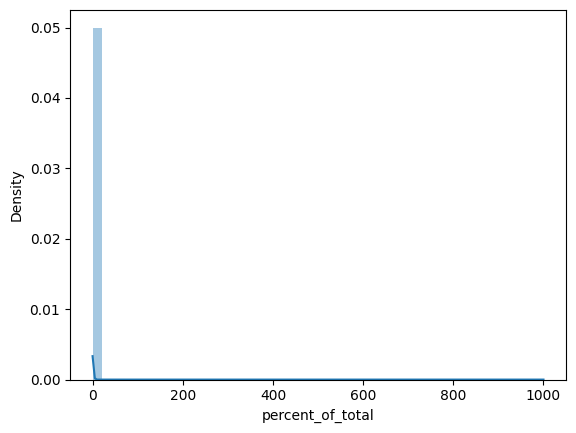

In [ ]:
sns_plot = sns.distplot(a2)
fig = sns_plot.get_figure()

<ipython-input-13-5eb756c74ae8>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns_plot = sns.distplot(a3)


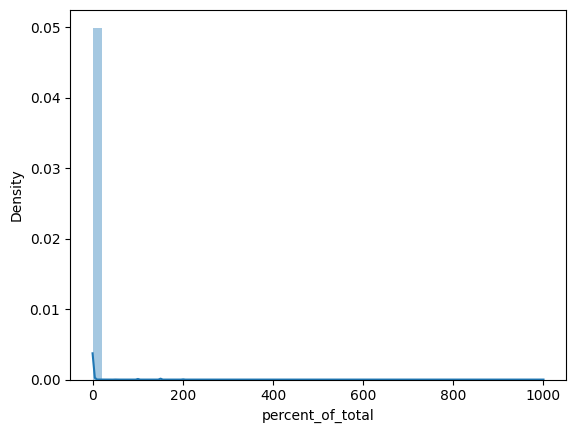

In [ ]:
sns_plot = sns.distplot(a3)
fig = sns_plot.get_figure()

Видно, что распределение очень сильно смещено к левому краю

In [ ]:
b1 = pd.DataFrame({'p': a1, 'group': ['Москва'] * len(a1)})
b2 = pd.DataFrame({'p': a2, 'group': ['Санкт-Петербург'] * len(a2)})
b3 = pd.DataFrame({'p': a3, 'group': ['Регионы'] * len(a3)})

In [ ]:
dfr = pd.concat([b1, b2, b3], axis = 0)

Проверка на равенство дисперсий в каждой группе

In [ ]:
import scipy.stats as st
from statistics import variance

В качестве проверки будем использовать фактическое сравнение дисперсии, а не дисперсионный тест, так как дисперсионный тест Левена может выдавать недостоверные результаты при очень большом объеме выборки. Дисперсии считаются разными, если отношение наибольшей дисперсии среди групп и наименьшей дисперсии больше, чем 4

In [ ]:
max(variance(a1), variance(a2), variance(a3))/min(variance(a1), variance(a2), variance(a3)) < 4

True

Дисперсии можно считать одинаковыми 

Принимаем гипотезу о равенстве дисперсий, проводим классический тест ANOVA

In [ ]:
welch_anova_res = oneway.anova_oneway(data = dfr['p'], groups=dfr['group'], use_var='equal', welch_correction=False, trim_frac=0.05)

In [ ]:
welch_anova_res.pvalue < 0.05

True

Выявлены статистически значимые различия, поэтому далее будет проводиться апостериорный тест Games-Howell, не предполагающий равные размеры выборки и устойчивый к ненормальности распределения

In [ ]:
result = pg.pairwise_gameshowell(dv='p', between='group', data=dfr) 

In [ ]:
result[result['pval'] > 0.05]

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges


Все регионы должны быть рассмотрены отдельно 

**Москва. Ценовые сегменты**

In [ ]:
d_m = d0[d0['region'] == 'Москва']

In [ ]:
a1 = d_m[(d_m['price_segment'] == 'Низкий (<500)')]['percent_of_total']
a2 = d_m[(d_m['price_segment'] == 'Средний (>500 - <1500)')]['percent_of_total']
a3 = d_m[(d_m['price_segment'] == 'Высокий (>1500 - <2500)')]['percent_of_total']
a4 = d_m[(d_m['price_segment'] == 'Премиум (>2500)')]['percent_of_total']

In [ ]:
b1 = pd.DataFrame({'p': a1, 'group': ['Низкий'] * len(a1)})
b2 = pd.DataFrame({'p': a2, 'group': ['Средний'] * len(a2)})
b3 = pd.DataFrame({'p': a3, 'group': ['Высокий'] * len(a3)})
b4 = pd.DataFrame({'p': a4, 'group': ['Премиум'] * len(a4)})

In [ ]:
dfr = pd.concat([b1, b2, b3, b4], axis = 0)

Посмотрим на распределение данных

<ipython-input-33-f8f8a147da7a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns_plot = sns.distplot(a1)


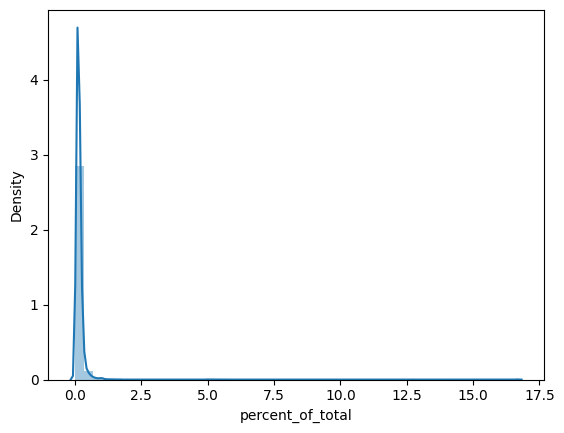

In [ ]:
sns_plot = sns.distplot(a1)
fig = sns_plot.get_figure()

<ipython-input-34-037438bdaea9>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns_plot = sns.distplot(a2)


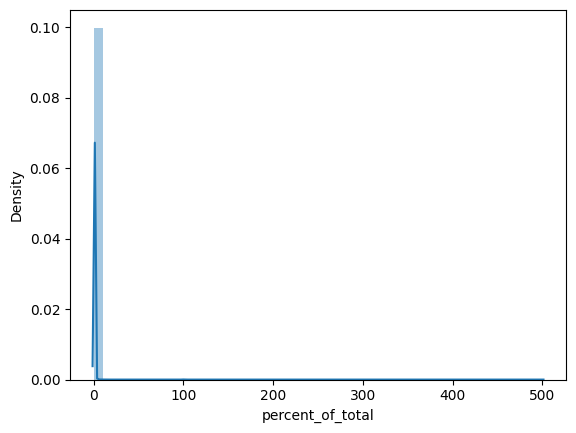

In [ ]:
sns_plot = sns.distplot(a2)
fig = sns_plot.get_figure()

<ipython-input-35-5eb756c74ae8>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns_plot = sns.distplot(a3)


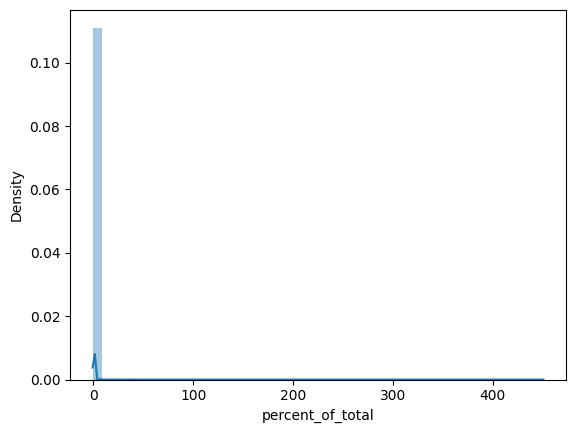

In [ ]:
sns_plot = sns.distplot(a3)
fig = sns_plot.get_figure()

Видно, что распределение очень сильно смещено к левому краю

Проверка на равенство дисперсий в каждой группе

В качестве проверки будем использовать фактическое сравнение дисперсии, а не дисперсионный тест, так как дисперсионный тест Левена может выдавать недостоверные результаты при очень большом объеме выборки. Дисперсии считаются разными, если отношение наибольшей дисперсии среди групп и наименьшей дисперсии больше, чем 4

In [ ]:
max(variance(a1), variance(a2), variance(a3))/min(variance(a1), variance(a2), variance(a3)) < 4

False

Дисперсии можно считать различными

Отклоняем гипотезу о равенстве дисперсий, проводим Welch ANOVA with winsorized variances and trimmed means

In [ ]:
welch_anova_result = oneway.anova_oneway(data = dfr['p'], groups=dfr['group'], use_var='unequal', welch_correction=False, trim_frac=0.05)

In [ ]:
welch_anova_result.pvalue < 0.05

True

Выявлены статистически значимые различия, поэтому далее будет проводиться апостериорный тест Games-Howell, не предполагающий равные размеры выборки и устойчивый к ненормальности распределения, а также не предполагающий равенства дисперсий

In [ ]:
result = pg.pairwise_gameshowell(dv='p', between='group', data=dfr) 

In [ ]:
result[result['pval'] > 0.05]['A'], result[result['pval'] > 0.05]['B']

(2    Высокий
 Name: A, dtype: object,
 2    Средний
 Name: B, dtype: object)

Высокий и средний сегменты должны быть объединены, а остальные рассмотрены отдельно

Объединяем Высокий и Средний сегменты, остальные рассматриваем отдельно

**Санкт-Петербург. Ценовые сегменты**

In [ ]:
d_spb = d0[d0['region'] == 'Санкт-Петербург']

In [ ]:
a1 = d_spb[(d_spb['price_segment'] == 'Низкий (<500)')]['percent_of_total']
a2 = d_spb[(d_spb['price_segment'] == 'Средний (>500 - <1500)')]['percent_of_total']
a3 = d_spb[(d_spb['price_segment'] == 'Высокий (>1500 - <2500)')]['percent_of_total']
a4 = d_spb[(d_spb['price_segment'] == 'Премиум (>2500)')]['percent_of_total']

<ipython-input-45-f8f8a147da7a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns_plot = sns.distplot(a1)


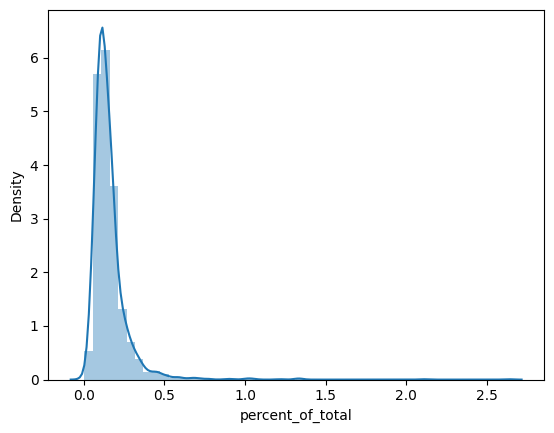

In [ ]:
sns_plot = sns.distplot(a1)
fig = sns_plot.get_figure()

<ipython-input-46-037438bdaea9>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns_plot = sns.distplot(a2)


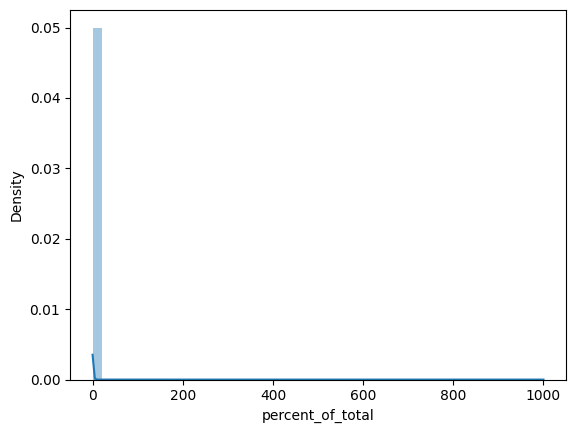

In [ ]:
sns_plot = sns.distplot(a2)
fig = sns_plot.get_figure()

<ipython-input-47-5eb756c74ae8>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns_plot = sns.distplot(a3)


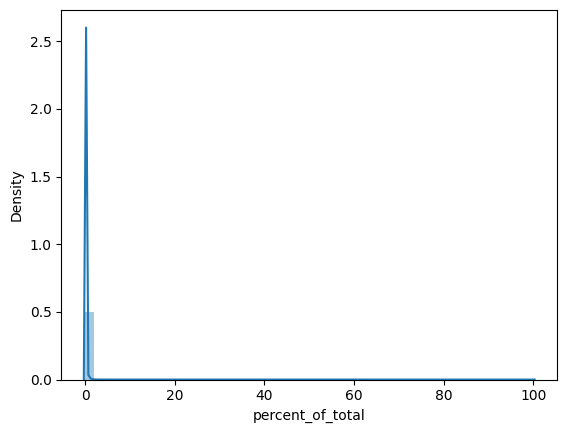

In [ ]:
sns_plot = sns.distplot(a3)
fig = sns_plot.get_figure()

<ipython-input-48-a6092403d272>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns_plot = sns.distplot(a4)


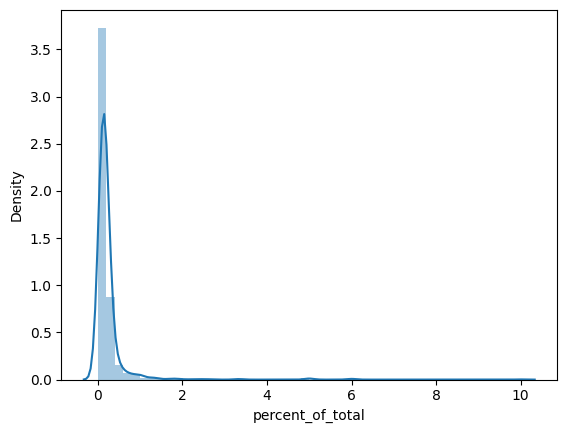

In [ ]:
sns_plot = sns.distplot(a4)
fig = sns_plot.get_figure()

Видно, что распределение сильно смещено к левому краю

Проверим равенство дисперсий

In [ ]:
max(variance(a1), variance(a2), variance(a3), variance(a4))/min(variance(a1), variance(a2), variance(a3), variance(a4)) < 4

False

Отклоняем гипотезу о равенстве дисперсий

In [ ]:
b1 = pd.DataFrame({'p': a1, 'group': ['Низкий'] * len(a1)})
b2 = pd.DataFrame({'p': a2, 'group': ['Средний'] * len(a2)})
b3 = pd.DataFrame({'p': a3, 'group': ['Высокий'] * len(a3)})
b4 = pd.DataFrame({'p': a4, 'group': ['Премиум'] * len(a4)})

In [ ]:
dfr = pd.concat([b1, b2, b3, b4], axis = 0)

In [ ]:
welch_anova_res = oneway.anova_oneway(data = dfr['p'], groups=dfr['group'], use_var='unequal', welch_correction=False, trim_frac=0.05) #дисперсионный тест на наличие статистически значимых отличий #дисперсионный тест на наличие статистически значимых отличий

In [ ]:
welch_anova_res.pvalue < 0.05

True

Выявлены статистически значимые различия

In [ ]:
result = pg.pairwise_gameshowell(dv='p', between='group', data=dfr) #апостериорный тест для выявления между какими группами есть отличия

In [ ]:
result[result['pval'] > 0.05]

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
2,Высокий,Средний,0.177063,0.176455,0.000609,0.008628,0.070531,124042.283928,0.999874,0.000243
4,Низкий,Средний,0.158013,0.176455,-0.018441,0.007617,-2.421136,75431.990939,0.073136,-0.006947


Премиум сегмент отличен от каждого из остальный, а низкий, средний и высокий сегменты могут быть объединены

**Регионы. Ценовые сегменты**

In [ ]:
d_r = d0[d0['region'] == 'Регионы']

In [ ]:
a1 = d_r[(d_r['price_segment'] == 'Низкий (<500)')]['percent_of_total']
a2 = d_r[(d_r['price_segment'] == 'Средний (>500 - <1500)')]['percent_of_total']
a3 = d_r[(d_r['price_segment'] == 'Высокий (>1500 - <2500)')]['percent_of_total']
a4 = d_r[(d_r['price_segment'] == 'Премиум (>2500)')]['percent_of_total']

<ipython-input-59-f8f8a147da7a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns_plot = sns.distplot(a1)


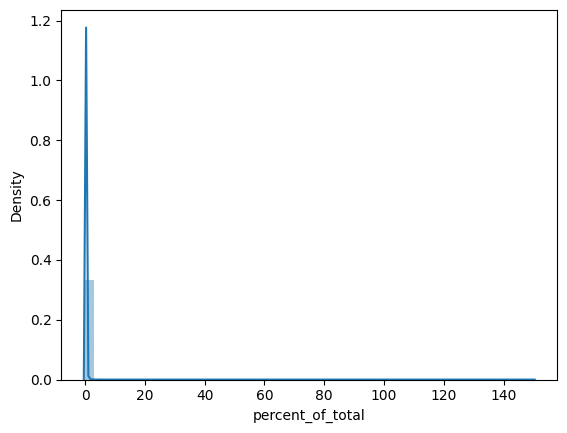

In [ ]:
sns_plot = sns.distplot(a1)
fig = sns_plot.get_figure()

<ipython-input-60-037438bdaea9>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns_plot = sns.distplot(a2)


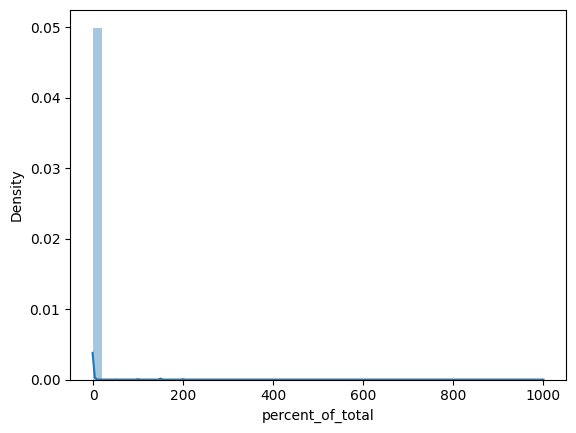

In [ ]:
sns_plot = sns.distplot(a2)
fig = sns_plot.get_figure()

<ipython-input-61-5eb756c74ae8>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns_plot = sns.distplot(a3)


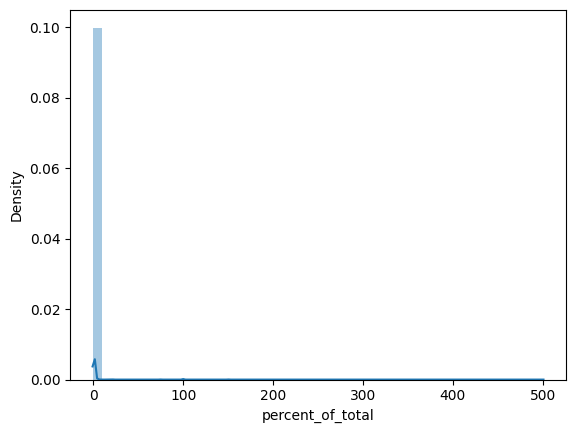

In [ ]:
sns_plot = sns.distplot(a3)
fig = sns_plot.get_figure()

<ipython-input-62-a6092403d272>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns_plot = sns.distplot(a4)


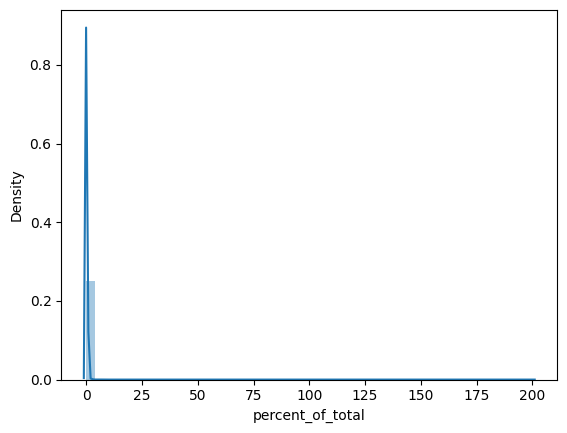

In [ ]:
sns_plot = sns.distplot(a4)
fig = sns_plot.get_figure()

In [ ]:
max(variance(a1), variance(a2), variance(a3), variance(a4))/min(variance(a1), variance(a2), variance(a3), variance(a4)) < 4

False

Отклоняем гипотезу о равенстве дисперсий

In [ ]:
b1 = pd.DataFrame({'p': a1, 'group': ['Низкий'] * len(a1)})
b2 = pd.DataFrame({'p': a2, 'group': ['Средний'] * len(a2)})
b3 = pd.DataFrame({'p': a3, 'group': ['Высокий'] * len(a3)})
b4 = pd.DataFrame({'p': a4, 'group': ['Премиум'] * len(a4)})

In [ ]:
dfr = pd.concat([b1, b2, b3, b4], axis = 0)

In [ ]:
welch_anova_result = oneway.anova_oneway(data = dfr['p'], groups=dfr['group'], use_var='unequal', welch_correction= False, trim_frac=0.1) #дисперсионный тест на наличие статистически значимых отличий #дисперсионный тест на наличие статистически значимых отличий

In [ ]:
welch_anova_result.pvalue < 0.05

True

In [ ]:
result = pg.pairwise_gameshowell(dv='p', between='group', data=dfr) #апостериорный тест для выявления между какими группами есть отличия

In [ ]:
result[result['pval'] >= 0.05]

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
1,Высокий,Премиум,0.231884,0.201737,0.030148,0.026435,1.140458,12469.046777,0.664424,0.010267
2,Высокий,Средний,0.231884,0.254596,-0.022712,0.013283,-1.709860,136055.126246,0.318435,-0.005222
3,Низкий,Премиум,0.174517,0.201737,-0.027219,0.024933,-1.091694,9896.682742,0.694643,-0.018704
5,Премиум,Средний,0.201737,0.254596,-0.052860,0.024949,-2.118739,9947.622319,0.147152,-0.011729


В данном случае все сегменты должны рассматриваться отдельно друг от друга 

**Диапазон 1 (1000-1500)**

In [ ]:
d1 = df[(df['check_sum'] <= 1500) & (df['check_sum'] > 1000)].copy().reset_index() #выделили рассматриваемый диапазон

In [ ]:
d1 = d1[d1['amount'] <= np.quantile(d1['amount'], 0.999)] #избавились от выбросов в чаевых

In [ ]:
d1 = d1[d1['amount'] > 0] #избавились от ошибок 

In [ ]:
d1['percent_of_total'] = d1['amount']/d1['check_sum']

Москва, Санкт-Перербург, Регионы

In [ ]:
a1 = d1[d1['region'] == 'Москва']['percent_of_total']
a2 = d1[d1['region'] == 'Санкт-Петербург']['percent_of_total']
a3 = d1[d1['region'] == 'Регионы']['percent_of_total']

In [ ]:
b1 = pd.DataFrame({'p': a1, 'group': ['Москва'] * len(a1)})
b2 = pd.DataFrame({'p': a2, 'group': ['Санкт-Петербург'] * len(a2)})
b3 = pd.DataFrame({'p': a3, 'group': ['Регионы'] * len(a3)})

<ipython-input-77-f8f8a147da7a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns_plot = sns.distplot(a1)


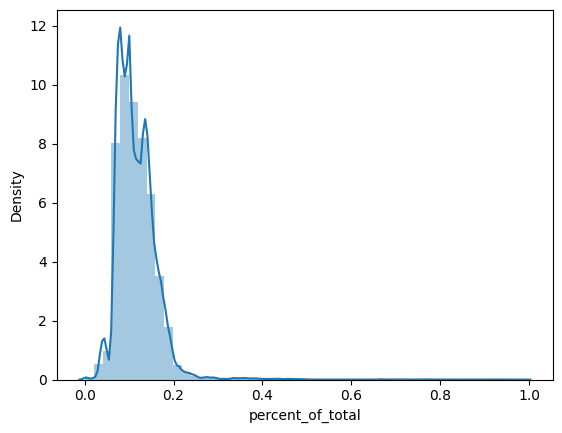

In [ ]:
sns_plot = sns.distplot(a1)
fig = sns_plot.get_figure()

<ipython-input-78-037438bdaea9>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns_plot = sns.distplot(a2)


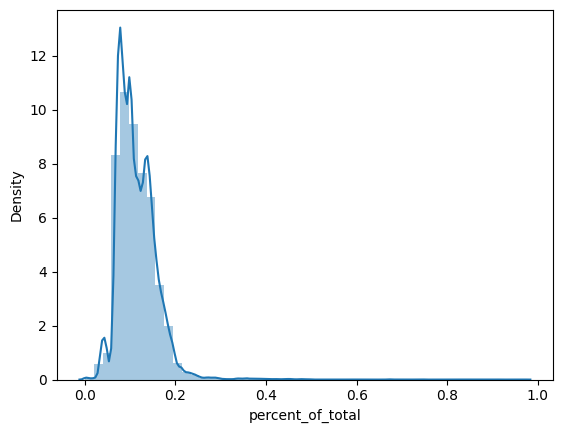

In [ ]:
sns_plot = sns.distplot(a2)
fig = sns_plot.get_figure()

<ipython-input-79-5eb756c74ae8>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns_plot = sns.distplot(a3)


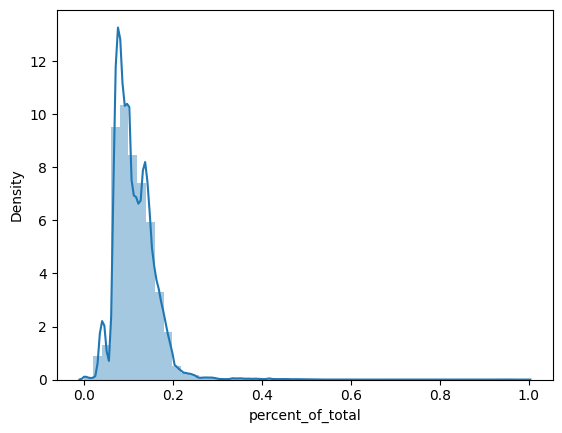

In [ ]:
sns_plot = sns.distplot(a3)
fig = sns_plot.get_figure()

Распределение сильно смещено влево

In [ ]:
max(variance(a1), variance(a2), variance(a3))/min(variance(a1), variance(a2), variance(a3)) < 4

True

Принимаем гипотезу о равенстве дисперсий

In [ ]:
dfr = pd.concat([b1, b2, b3], axis = 0)

In [ ]:
welch_anova_result = oneway.anova_oneway(data = dfr['p'], groups=dfr['group'], use_var='equal', welch_correction=False, trim_frac=0.05) #дисперсионный тест на наличие статистически значимых отличий #дисперсионный тест на наличие статистически значимых отличий

In [ ]:
welch_anova_result.pvalue < 0.05

True

In [ ]:
result = pg.pairwise_gameshowell(dv='p', between='group', data=dfr) #апостериорный тест для выявления между какими группами есть отличия

In [ ]:
result[result['pval'] >= 0.05]

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges


В данном случае все регионы должны рассматриваться отдельно друг от друга 

**Москва. Ценовые сегменты**

In [ ]:
d_m = d1[d1['region'] == 'Москва']

In [ ]:
a1 = d_m[(d_m['price_segment'] == 'Низкий (<500)')]['percent_of_total']
a2 = d_m[(d_m['price_segment'] == 'Средний (>500 - <1500)')]['percent_of_total']
a3 = d_m[(d_m['price_segment'] == 'Высокий (>1500 - <2500)')]['percent_of_total']
a4 = d_m[(d_m['price_segment'] == 'Премиум (>2500)')]['percent_of_total']

In [ ]:
b1 = pd.DataFrame({'p': a1, 'group': ['Низкий'] * len(a1)})
b2 = pd.DataFrame({'p': a2, 'group': ['Средний'] * len(a2)})
b3 = pd.DataFrame({'p': a3, 'group': ['Высокий'] * len(a3)})
b4 = pd.DataFrame({'p': a4, 'group': ['Премиум'] * len(a4)})

In [ ]:
dfr = pd.concat([b1, b2, b3, b4], axis = 0)

<ipython-input-91-f8f8a147da7a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns_plot = sns.distplot(a1)


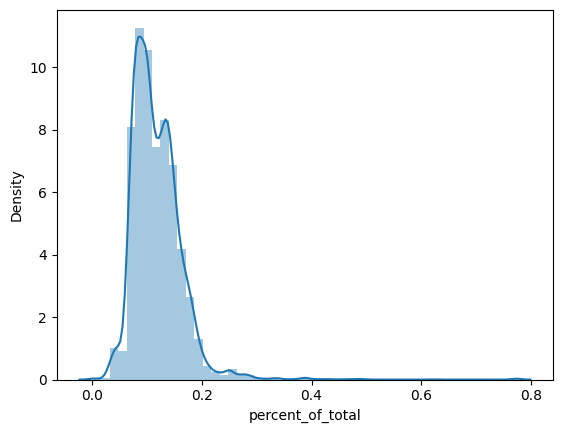

In [ ]:
sns_plot = sns.distplot(a1)
fig = sns_plot.get_figure()

<ipython-input-92-037438bdaea9>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns_plot = sns.distplot(a2)


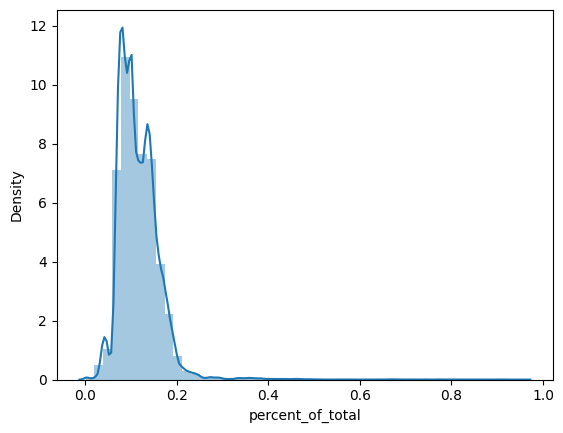

In [ ]:
sns_plot = sns.distplot(a2)
fig = sns_plot.get_figure()

<ipython-input-93-5eb756c74ae8>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns_plot = sns.distplot(a3)


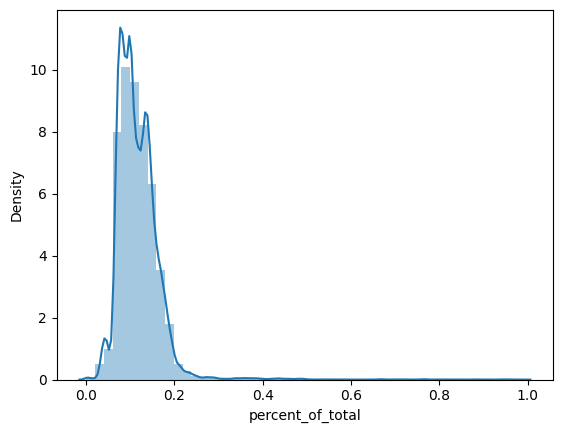

In [ ]:
sns_plot = sns.distplot(a3)
fig = sns_plot.get_figure()

<ipython-input-94-a6092403d272>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns_plot = sns.distplot(a4)


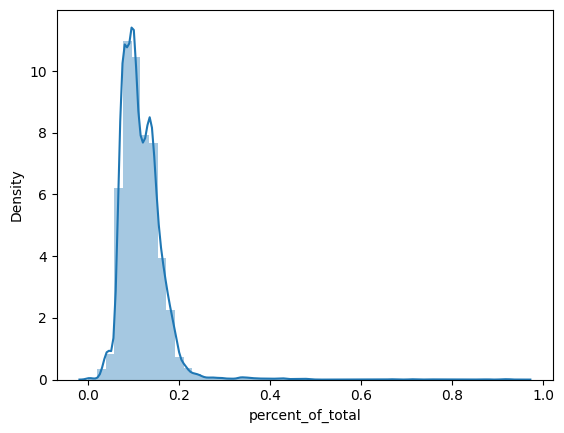

In [ ]:
sns_plot = sns.distplot(a4)
fig = sns_plot.get_figure()

In [ ]:
max(variance(a1), variance(a2), variance(a3), variance(a4))/min(variance(a1), variance(a2), variance(a3), variance(a4)) < 4

True

Принимаем гипотезу о равенстве дисперсий 

In [ ]:
welch_anova_result = oneway.anova_oneway(data = dfr['p'], groups=dfr['group'], use_var='unequal', welch_correction=True, trim_frac=0.05) #дисперсионный тест на наличие статистически значимых отличий #дисперсионный тест на наличие статистически значимых отличий

In [ ]:
welch_anova_result.pvalue < 0.05

True

In [ ]:
result = pg.pairwise_gameshowell(dv='p', between='group', data=dfr) #апостериорный тест для выявления между какими группами есть отличия

In [ ]:
result[result['pval'] >= 0.05]

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,Высокий,Низкий,0.116771,0.117679,-0.000908,0.000589,-1.541246,8151.912151,0.412798,-0.018166
1,Высокий,Премиум,0.116771,0.117359,-0.000587,0.000356,-1.648926,43635.744298,0.351154,-0.011674
3,Низкий,Премиум,0.117679,0.117359,0.000321,0.000644,0.498173,11348.637399,0.959500,0.006451


Высокий, низкий и премиум должны быть рассмотрены вместе, а средний отдельно от них

**Санкт-Петербург. Ценовые сегменты**

In [ ]:
d_spb = d1[d1['region'] == 'Санкт-Петербург']

In [ ]:
a1 = d_spb[(d_spb['price_segment'] == 'Низкий (<500)')]['percent_of_total']
a2 = d_spb[(d_spb['price_segment'] == 'Средний (>500 - <1500)')]['percent_of_total']
a3 = d_spb[(d_spb['price_segment'] == 'Высокий (>1500 - <2500)')]['percent_of_total']
a4 = d_spb[(d_spb['price_segment'] == 'Премиум (>2500)')]['percent_of_total']

In [ ]:
b1 = pd.DataFrame({'p': a1, 'group': ['Низкий'] * len(a1)})
b2 = pd.DataFrame({'p': a2, 'group': ['Средний'] * len(a2)})
b3 = pd.DataFrame({'p': a3, 'group': ['Высокий'] * len(a3)})
b4 = pd.DataFrame({'p': a4, 'group': ['Премиум'] * len(a4)})

In [ ]:
dfr = pd.concat([b1, b2, b3, b4], axis = 0)

<ipython-input-106-f8f8a147da7a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns_plot = sns.distplot(a1)


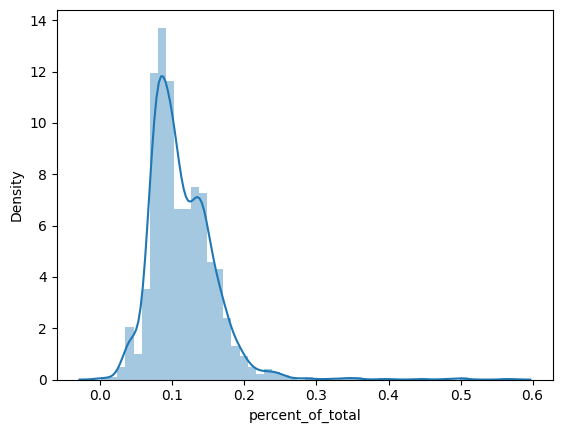

In [ ]:
sns_plot = sns.distplot(a1)
fig = sns_plot.get_figure()

<ipython-input-107-037438bdaea9>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns_plot = sns.distplot(a2)


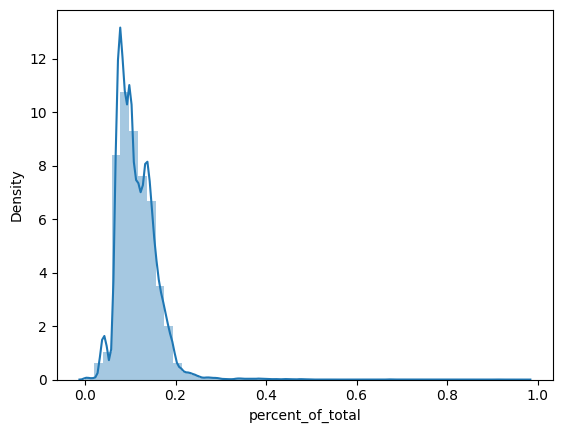

In [ ]:
sns_plot = sns.distplot(a2)
fig = sns_plot.get_figure()

<ipython-input-108-5eb756c74ae8>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns_plot = sns.distplot(a3)


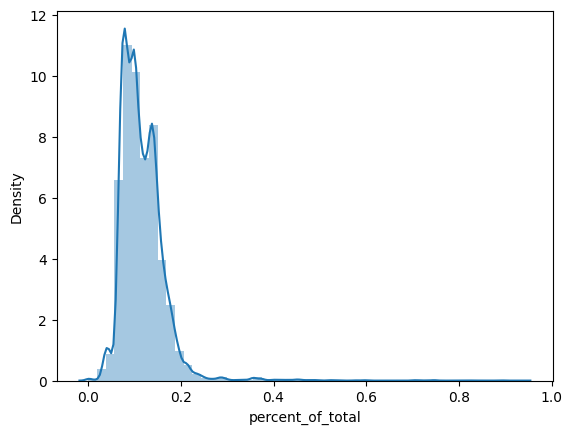

In [ ]:
sns_plot = sns.distplot(a3)
fig = sns_plot.get_figure()

<ipython-input-109-a6092403d272>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns_plot = sns.distplot(a4)


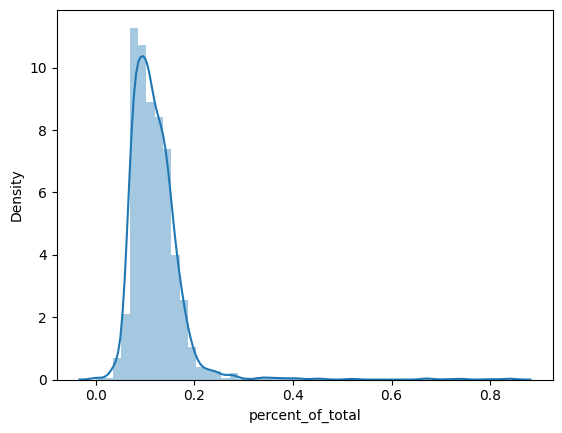

In [ ]:
sns_plot = sns.distplot(a4)
fig = sns_plot.get_figure()

In [ ]:
max(variance(a1), variance(a2), variance(a3), variance(a4))/min(variance(a1), variance(a2), variance(a3), variance(a4)) < 4

True

Принимаем гипотезу о равенстве дисперсий 

In [ ]:
welch_anova_result = oneway.anova_oneway(data = dfr['p'], groups=dfr['group'], use_var='equal', welch_correction=False, trim_frac=0.05) #дисперсионный тест на наличие статистически значимых отличий #дисперсионный тест на наличие статистически значимых отличий

In [ ]:
welch_anova_result.pvalue < 0.05

True

In [ ]:
result = pg.pairwise_gameshowell(dv='p', between='group', data=dfr) #апостериорный тест для выявления между какими группами есть отличия

In [ ]:
result[result['pval'] >= 0.05]

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
4,Низкий,Средний,0.113165,0.113842,-0.000676,0.001025,-0.659599,2068.693764,0.912179,-0.014893


**Регионы. Ценовые сегменты**

In [ ]:
d_r = d1[d1['region'] == 'Регионы']

In [ ]:
a1 = d_r[(d_r['price_segment'] == 'Низкий (<500)')]['percent_of_total']
a2 = d_r[(d_r['price_segment'] == 'Средний (>500 - <1500)')]['percent_of_total']
a3 = d_r[(d_r['price_segment'] == 'Высокий (>1500 - <2500)')]['percent_of_total']
a4 = d_r[(d_r['price_segment'] == 'Премиум (>2500)')]['percent_of_total']

In [ ]:
b1 = pd.DataFrame({'p': a1, 'group': ['Низкий'] * len(a1)})
b2 = pd.DataFrame({'p': a2, 'group': ['Средний'] * len(a2)})
b3 = pd.DataFrame({'p': a3, 'group': ['Высокий'] * len(a3)})
b4 = pd.DataFrame({'p': a4, 'group': ['Премиум'] * len(a4)})

In [ ]:
dfr = pd.concat([b1, b2, b3, b4], axis = 0)

<ipython-input-120-f8f8a147da7a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns_plot = sns.distplot(a1)


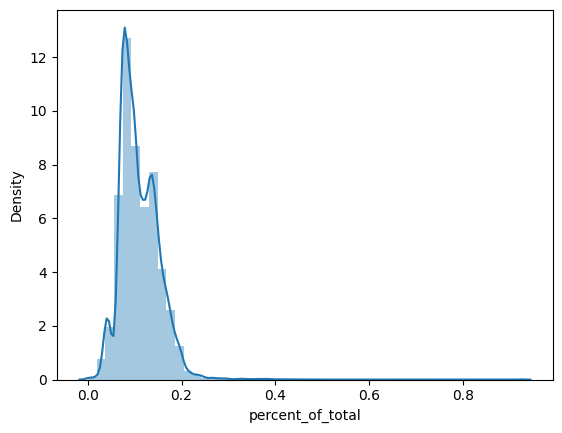

In [ ]:
sns_plot = sns.distplot(a1)
fig = sns_plot.get_figure()

<ipython-input-121-037438bdaea9>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns_plot = sns.distplot(a2)


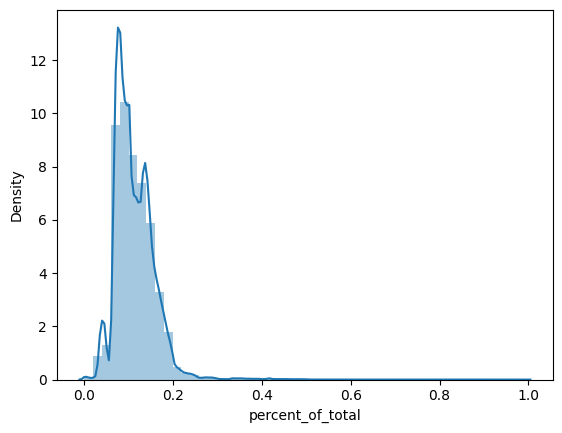

In [ ]:
sns_plot = sns.distplot(a2)
fig = sns_plot.get_figure()

<ipython-input-122-5eb756c74ae8>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns_plot = sns.distplot(a3)


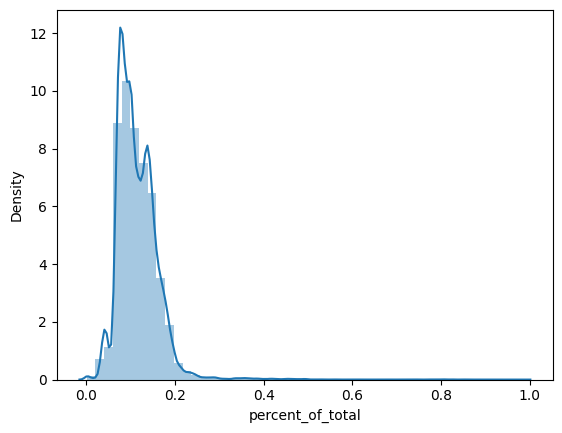

In [ ]:
sns_plot = sns.distplot(a3)
fig = sns_plot.get_figure()

<ipython-input-123-a6092403d272>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns_plot = sns.distplot(a4)


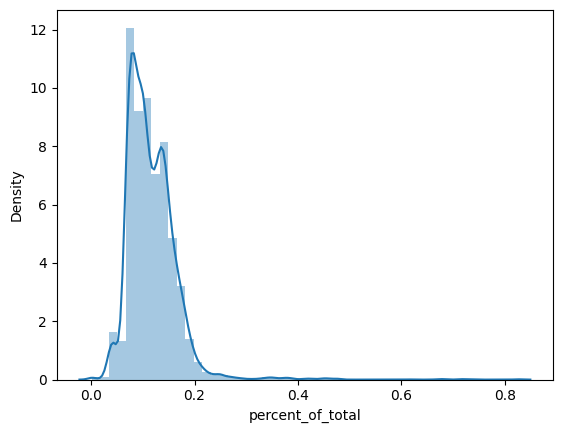

In [ ]:
sns_plot = sns.distplot(a4)
fig = sns_plot.get_figure()

In [ ]:
max(variance(a1), variance(a2), variance(a3), variance(a4))/min(variance(a1), variance(a2), variance(a3), variance(a4)) < 4

True

Принимаем гипотезу о равенстве дисперсий 

In [ ]:
welch_anova_result = oneway.anova_oneway(data = dfr['p'], groups=dfr['group'], use_var='equal', welch_correction=False, trim_frac=0.05) #дисперсионный тест на наличие статистически значимых отличий #дисперсионный тест на наличие статистически значимых отличий

In [ ]:
welch_anova_result.pvalue < 0.05

True

In [ ]:
result = pg.pairwise_gameshowell(dv='p', between='group', data=dfr) #апостериорный тест для выявления между какими группами есть отличия

In [ ]:
result[result['pval'] >= 0.05]

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
1,Высокий,Премиум,0.114968,0.116316,-0.001349,0.000525,-2.56713,13836.414809,0.050295,-0.0273


Объединяем высокий и премиум сегменты

**Диапазон 2 (1500-2100)**

In [ ]:
d2 = df[(df['check_sum'] <= 2100) & (df['check_sum'] > 1500)].copy().reset_index() #выделили рассматриваемый диапазон

In [ ]:
d2 = d2[d2['amount'] <= np.quantile(d2['amount'], 0.999)] #избавились от выбросов в чаевых

In [ ]:
d2 = d2[d2['amount'] > 0] #избавились от ошибок 

In [ ]:
d2['percent_of_total'] = d2['amount']/d2['check_sum']

Москва, Санкт-Перербург, Регионы

In [ ]:
a1 = d2[d2['region'] == 'Москва']['percent_of_total']
a2 = d2[d2['region'] == 'Санкт-Петербург']['percent_of_total']
a3 = d2[d2['region'] == 'Регионы']['percent_of_total']

In [ ]:
b1 = pd.DataFrame({'p': a1, 'group': ['Москва'] * len(a1)})
b2 = pd.DataFrame({'p': a2, 'group': ['Санкт-Петербург'] * len(a2)})
b3 = pd.DataFrame({'p': a3, 'group': ['Регионы'] * len(a3)})

In [ ]:
sns_plot = sns.distplot(a1)
fig = sns_plot.get_figure()

In [ ]:
sns_plot = sns.distplot(a2)
fig = sns_plot.get_figure()

In [ ]:
sns_plot = sns.distplot(a3)
fig = sns_plot.get_figure()

Распределение имеет явный пик в 10%

In [ ]:
max(variance(a1), variance(a2), variance(a3))/min(variance(a1), variance(a2), variance(a3)) < 4

True

Принимаем гипотезу о равенстве дисперсий

In [ ]:
dfr = pd.concat([b1, b2, b3], axis = 0)

In [ ]:
welch_anova_result = oneway.anova_oneway(data = dfr['p'], groups=dfr['group'], use_var='equal', welch_correction=False, trim_frac=0.05) #дисперсионный тест на наличие статистически значимых отличий #дисперсионный тест на наличие статистически значимых отличий

In [ ]:
welch_anova_result.pvalue < 0.05

True

In [ ]:
result = pg.pairwise_gameshowell(dv='p', between='group', data=dfr) #апостериорный тест для выявления между какими группами есть отличия

In [ ]:
result

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,Москва,Регионы,0.108498,0.105016,0.003482,0.000093,37.505243,628941.131383,0.000000,0.087320
1,Москва,Санкт-Петербург,0.108498,0.105391,0.003107,0.000112,27.622325,432215.282421,0.000000,0.079805
2,Регионы,Санкт-Петербург,0.105016,0.105391,-0.000375,0.000103,-3.635920,381896.060229,0.000809,-0.009508


In [ ]:
result[result['pval'] >= 0.05]

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges


**Москва. Ценовые сегменты**

In [ ]:
d_m = d2[d2['region'] == 'Москва']

In [ ]:
a1 = d_m[(d_m['price_segment'] == 'Низкий (<500)')]['percent_of_total']
a2 = d_m[(d_m['price_segment'] == 'Средний (>500 - <1500)')]['percent_of_total']
a3 = d_m[(d_m['price_segment'] == 'Высокий (>1500 - <2500)')]['percent_of_total']
a4 = d_m[(d_m['price_segment'] == 'Премиум (>2500)')]['percent_of_total']

In [ ]:
b1 = pd.DataFrame({'p': a1, 'group': ['Низкий'] * len(a1)})
b2 = pd.DataFrame({'p': a2, 'group': ['Средний'] * len(a2)})
b3 = pd.DataFrame({'p': a3, 'group': ['Высокий'] * len(a3)})
b4 = pd.DataFrame({'p': a4, 'group': ['Премиум'] * len(a4)})

In [ ]:
dfr = pd.concat([b1, b2, b3, b4], axis = 0)

In [ ]:
sns_plot = sns.distplot(a1)
fig = sns_plot.get_figure()

In [ ]:
sns_plot = sns.distplot(a2)
fig = sns_plot.get_figure()

In [ ]:
sns_plot = sns.distplot(a3)
fig = sns_plot.get_figure()

In [ ]:
sns_plot = sns.distplot(a4)
fig = sns_plot.get_figure()

In [ ]:
max(variance(a1), variance(a2), variance(a3), variance(a4))/min(variance(a1), variance(a2), variance(a3), variance(a4)) < 4

True

Принимаем гипотезу о равенстве дисперсий 

In [ ]:
welch_anova_result = oneway.anova_oneway(data = dfr['p'], groups=dfr['group'], use_var='equal', welch_correction=True, trim_frac=0) #дисперсионный тест на наличие статистически значимых отличий #дисперсионный тест на наличие статистически значимых отличий

In [ ]:
welch_anova_result.pvalue < 0.05

True

In [ ]:
result = pg.pairwise_gameshowell(dv='p', between='group', data=dfr) #апостериорный тест для выявления между какими группами есть отличия

In [ ]:
result[result['pval'] < 0.05]

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
1,Высокий,Премиум,0.108880,0.109577,-0.000697,0.000244,-2.852321,63341.393360,2.253955e-02,-0.017429
2,Высокий,Средний,0.108880,0.107954,0.000927,0.000160,5.782879,223192.683273,4.400495e-08,0.023462
5,Премиум,Средний,0.109577,0.107954,0.001623,0.000235,6.921362,55228.585039,8.418488e-12,0.041121


In [ ]:
result[result['pval'] >= 0.05]

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,Высокий,Низкий,0.108880,0.108536,0.000345,0.000463,0.744197,8006.141318,0.879164,0.008691
3,Низкий,Премиум,0.108536,0.109577,-0.001042,0.000494,-2.108738,10252.031953,0.150314,-0.026105
4,Низкий,Средний,0.108536,0.107954,0.000582,0.000458,1.269436,7663.031194,0.582497,0.014858


В данном случае высокий,средний и премиум могут быть объединены, а низкий рассматриваться отдельно 

**Санкт-Петербург +  Регионы. Ценовые сегменты**

In [ ]:
d_sr = d2[d2['region'] != 'Москва']

In [ ]:
a1 = d_sr[(d_sr['price_segment'] == 'Низкий (<500)')]['percent_of_total']
a2 = d_sr[(d_sr['price_segment'] == 'Средний (>500 - <1500)')]['percent_of_total']
a3 = d_sr[(d_sr['price_segment'] == 'Высокий (>1500 - <2500)')]['percent_of_total']
a4 = d_sr[(d_sr['price_segment'] == 'Премиум (>2500)')]['percent_of_total']

In [ ]:
b1 = pd.DataFrame({'p': a1, 'group': ['Низкий'] * len(a1)})
b2 = pd.DataFrame({'p': a2, 'group': ['Средний'] * len(a2)})
b3 = pd.DataFrame({'p': a3, 'group': ['Высокий'] * len(a3)})
b4 = pd.DataFrame({'p': a4, 'group': ['Премиум'] * len(a4)})

In [ ]:
dfr = pd.concat([b1, b2, b3, b4], axis = 0)

In [ ]:
sns_plot = sns.distplot(a1)
fig = sns_plot.get_figure()

In [ ]:
sns_plot = sns.distplot(a2)
fig = sns_plot.get_figure()

In [ ]:
sns_plot = sns.distplot(a3)
fig = sns_plot.get_figure()

In [ ]:
sns_plot = sns.distplot(a4)
fig = sns_plot.get_figure()

In [ ]:
max(variance(a1), variance(a2), variance(a3), variance(a4))/min(variance(a1), variance(a2), variance(a3), variance(a4)) < 4

True

Принимаем гипотезу о равенстве дисперсий 

In [ ]:
welch_anova_result = oneway.anova_oneway(data = dfr['p'], groups=dfr['group'], use_var='equal', welch_correction=False, trim_frac=0.05) #дисперсионный тест на наличие статистически значимых отличий #дисперсионный тест на наличие статистически значимых отличий

In [ ]:
welch_anova_result.pvalue < 0.05

True

In [ ]:
result = pg.pairwise_gameshowell(dv='p', between='group', data=dfr) #апостериорный тест для выявления между какими группами есть отличия

In [ ]:
result[result['pval'] >= 0.05]

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges


В данном случае все ценовые сегменты должны быть рассмотрены отдельно 

**Диапазон 3(2100-2700)**

In [ ]:
d3 = df[(df['check_sum'] <= 2700) & (df['check_sum'] > 2100)].copy().reset_index() #выделили рассматриваемый диапазон

In [ ]:
d3 = d3[d3['amount'] <= np.quantile(d3['amount'], 0.999)] #избавились от выбросов в чаевых

In [ ]:
d3 = d3[d3['amount'] > 0] #избавились от ошибок 

In [ ]:
d3['percent_of_total'] = d3['amount']/d3['check_sum']

Москва, Санкт-Перербург, Регионы

In [ ]:
a1 = d3[d3['region'] == 'Москва']['percent_of_total']
a2 = d3[d3['region'] == 'Санкт-Петербург']['percent_of_total']
a3 = d3[d3['region'] == 'Регионы']['percent_of_total']

In [ ]:
sns_plot = sns.distplot(a1)
fig = sns_plot.get_figure()

In [ ]:
sns_plot = sns.distplot(a2)
fig = sns_plot.get_figure()

In [ ]:
sns_plot = sns.distplot(a3)
fig = sns_plot.get_figure()

Распределение имеет явный пик в 10%

In [ ]:
max(variance(a1), variance(a2), variance(a3))/min(variance(a1), variance(a2), variance(a3)) < 4

True

Принимаем гипотезу о равенстве дисперсий

In [ ]:
dfr = pd.concat([b1, b2, b3], axis = 0)

In [ ]:
welch_anova_result = oneway.anova_oneway(data = dfr['p'], groups=dfr['group'], use_var='equal', welch_correction=False, trim_frac=0.01) #дисперсионный тест на наличие статистически значимых отличий #дисперсионный тест на наличие статистически значимых отличий

In [ ]:
welch_anova_result.pvalue < 0.05

True

In [ ]:
result = pg.pairwise_gameshowell(dv='p', between='group', data=dfr) #апостериорный тест для выявления между какими группами есть отличия

In [ ]:
result

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,Москва,Регионы,0.101080,0.097994,3.085396e-03,0.000090,34.311132,582688.163146,0.000000,0.086570
1,Москва,Санкт-Петербург,0.101080,0.097995,3.085031e-03,0.000110,28.136957,336230.600393,0.000000,0.089037
2,Регионы,Санкт-Петербург,0.097994,0.097995,-3.655066e-07,0.000104,-0.003499,311169.464565,0.999993,-0.000010


In [ ]:
result[result['pval'] >= 0.05]

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
2,Регионы,Санкт-Петербург,0.097994,0.097995,-3.655066e-07,0.000104,-0.003499,311169.464565,0.999993,-0.00001


В данном случае Регионы и Санкт-Петербург должны рассматриваться вместе

**Москва. Ценовые сегменты**

In [ ]:
d_m = d3[d3['region'] == 'Москва']

In [ ]:
a1 = d_m[(d_m['price_segment'] == 'Низкий (<500)')]['percent_of_total']
a2 = d_m[(d_m['price_segment'] == 'Средний (>500 - <1500)')]['percent_of_total']
a3 = d_m[(d_m['price_segment'] == 'Высокий (>1500 - <2500)')]['percent_of_total']
a4 = d_m[(d_m['price_segment'] == 'Премиум (>2500)')]['percent_of_total']

In [ ]:
b1 = pd.DataFrame({'p': a1, 'group': ['Низкий'] * len(a1)})
b2 = pd.DataFrame({'p': a2, 'group': ['Средний'] * len(a2)})
b3 = pd.DataFrame({'p': a3, 'group': ['Высокий'] * len(a3)})
b4 = pd.DataFrame({'p': a4, 'group': ['Премиум'] * len(a4)})

In [ ]:
dfr = pd.concat([b1, b2, b3, b4], axis = 0)

In [ ]:
sns_plot = sns.distplot(a1)
fig = sns_plot.get_figure()

In [ ]:
sns_plot = sns.distplot(a2)
fig = sns_plot.get_figure()

In [ ]:
sns_plot = sns.distplot(a3)
fig = sns_plot.get_figure()

In [ ]:
sns_plot = sns.distplot(a4)
fig = sns_plot.get_figure()

In [ ]:
max(variance(a1), variance(a2), variance(a3), variance(a4))/min(variance(a1), variance(a2), variance(a3), variance(a4)) < 4

True

Принимаем гипотезу о равенстве дисперсий 

In [ ]:
welch_result_anova = oneway.anova_oneway(data = dfr['p'], groups=dfr['group'], use_var='equal', welch_correction=True, trim_frac=0) #дисперсионный тест на наличие статистически значимых отличий #дисперсионный тест на наличие статистически значимых отличий

In [ ]:
welch_result_anova.pvalue < 0.05

True

In [ ]:
result = pg.pairwise_gameshowell(dv='p', between='group', data=dfr) #апостериорный тест для выявления между какими группами есть отличия

In [ ]:
result[result['pval'] >= 0.05]

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,Высокий,Низкий,0.100995,0.101428,-0.000433,0.000493,-0.877077,6154.361376,0.816760,-0.012541
2,Высокий,Средний,0.100995,0.100727,0.000268,0.000148,1.812397,216334.256039,0.267377,0.007705
3,Низкий,Премиум,0.101428,0.102409,-0.000981,0.000515,-1.905008,7277.206479,0.225939,-0.027731
4,Низкий,Средний,0.101428,0.100727,0.000701,0.000492,1.425580,6074.097325,0.483312,0.019925


В данном случае требуется проведение симуляционного моделирования для более точной кластеризации

**Санкт-Петербург +  Регионы. Ценовые сегменты**

In [ ]:
d_sr = d2[d2['region'] != 'Москва']

In [ ]:
a1 = d_sr[(d_sr['price_segment'] == 'Низкий (<500)')]['percent_of_total']
a2 = d_sr[(d_sr['price_segment'] == 'Средний (>500 - <1500)')]['percent_of_total']
a3 = d_sr[(d_sr['price_segment'] == 'Высокий (>1500 - <2500)')]['percent_of_total']
a4 = d_sr[(d_sr['price_segment'] == 'Премиум (>2500)')]['percent_of_total']

In [ ]:
b1 = pd.DataFrame({'p': a1, 'group': ['Низкий'] * len(a1)})
b2 = pd.DataFrame({'p': a2, 'group': ['Средний'] * len(a2)})
b3 = pd.DataFrame({'p': a3, 'group': ['Высокий'] * len(a3)})
b4 = pd.DataFrame({'p': a4, 'group': ['Премиум'] * len(a4)})

In [ ]:
dfr = pd.concat([b1, b2, b3, b4], axis = 0)

In [ ]:
sns_plot = sns.distplot(a1)
fig = sns_plot.get_figure()

In [ ]:
sns_plot = sns.distplot(a2)
fig = sns_plot.get_figure()

In [ ]:
sns_plot = sns.distplot(a3)
fig = sns_plot.get_figure()

In [ ]:
sns_plot = sns.distplot(a4)
fig = sns_plot.get_figure()

In [ ]:
max(variance(a1), variance(a2), variance(a3), variance(a4))/min(variance(a1), variance(a2), variance(a3), variance(a4)) < 4

True

Принимаем гипотезу о равенстве дисперсий 

In [ ]:
welch_result_anova = oneway.anova_oneway(data = dfr['p'], groups=dfr['group'], use_var='equal', welch_correction=False, trim_frac=0.01) #дисперсионный тест на наличие статистически значимых отличий #дисперсионный тест на наличие статистически значимых отличий

In [ ]:
welch_result_anova.pvalue < 0.05

True

In [ ]:
result = pg.pairwise_gameshowell(dv='p', between='group', data=dfr) #апостериорный тест для выявления между какими группами есть отличия

In [ ]:
result[result['pval'] >= 0.05]

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges


В данном случае все ценовые сегменты должны быть рассмотрены отдельно 

**Диапазон 4(2700-3300)**

In [ ]:
d4 = df[(df['check_sum'] <= 3300) & (df['check_sum'] > 2700)].copy().reset_index() #выделили рассматриваемый диапазон

In [ ]:
d4 = d4[d4['amount'] <= np.quantile(d4['amount'], 0.999)] #избавились от выбросов в чаевых

In [ ]:
d4 = d4[d4['amount'] > 0] #избавились от ошибок 

In [ ]:
d4['percent_of_total'] = d4['amount']/d4['check_sum']

Москва, Санкт-Перербург, Регионы

In [ ]:
a1 = d3[d3['region'] == 'Москва']['percent_of_total']
a2 = d3[d3['region'] == 'Санкт-Петербург']['percent_of_total']
a3 = d3[d3['region'] == 'Регионы']['percent_of_total']

In [ ]:
b1 = pd.DataFrame({'p': a1, 'group': ['Москва'] * len(a1)})
b2 = pd.DataFrame({'p': a2, 'group': ['Санкт-Петербург'] * len(a2)})
b3 = pd.DataFrame({'p': a3, 'group': ['Регионы'] * len(a3)})

In [ ]:
sns_plot = sns.distplot(a1)
fig = sns_plot.get_figure()

In [ ]:
sns_plot = sns.distplot(a2)
fig = sns_plot.get_figure()

In [ ]:
sns_plot = sns.distplot(a3)
fig = sns_plot.get_figure()

Распределение имеет явный пик в 10%

In [ ]:
max(variance(a1), variance(a2), variance(a3))/min(variance(a1), variance(a2), variance(a3)) < 4

True

Принимаем гипотезу о равенстве дисперсий

In [ ]:
dfr = pd.concat([b1, b2, b3], axis = 0)

In [ ]:
welch_result_anova = oneway.anova_oneway(data = dfr['p'], groups=dfr['group'], use_var='equal', welch_correction=False, trim_frac=0) #дисперсионный тест на наличие статистически значимых отличий #дисперсионный тест на наличие статистически значимых отличий

In [ ]:
welch_result_anova.pvalue < 0.05

True

In [ ]:
result = pg.pairwise_gameshowell(dv='p', between='group', data=dfr) #апостериорный тест для выявления между какими группами есть отличия

In [ ]:
result

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,Москва,Регионы,0.101080,0.097546,0.003533,0.000090,39.293113,582688.163146,0.000000,0.099140
1,Москва,Санкт-Петербург,0.101080,0.097995,0.003085,0.000110,28.136957,336230.600393,0.000000,0.089037
2,Регионы,Санкт-Петербург,0.097546,0.097995,-0.000448,0.000104,-4.292448,311169.464565,0.000052,-0.012605


In [ ]:
result[result['pval'] >= 0.05]

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges


В данном случае все регионы должны рассматриваться отдельно 

**Москва. Ценовые сегменты**

In [ ]:
d_m = d4[d4['region'] == 'Москва']

In [ ]:
a1 = d_m[(d_m['price_segment'] == 'Низкий (<500)')]['percent_of_total']
a2 = d_m[(d_m['price_segment'] == 'Средний (>500 - <1500)')]['percent_of_total']
a3 = d_m[(d_m['price_segment'] == 'Высокий (>1500 - <2500)')]['percent_of_total']
a4 = d_m[(d_m['price_segment'] == 'Премиум (>2500)')]['percent_of_total']

In [ ]:
b1 = pd.DataFrame({'p': a1, 'group': ['Низкий'] * len(a1)})
b2 = pd.DataFrame({'p': a2, 'group': ['Средний'] * len(a2)})
b3 = pd.DataFrame({'p': a3, 'group': ['Высокий'] * len(a3)})
b4 = pd.DataFrame({'p': a4, 'group': ['Премиум'] * len(a4)})

In [ ]:
dfr = pd.concat([b1, b2, b3, b4], axis = 0)

In [ ]:
sns_plot = sns.distplot(a1)
fig = sns_plot.get_figure()

In [ ]:
sns_plot = sns.distplot(a2)
fig = sns_plot.get_figure()

In [ ]:
sns_plot = sns.distplot(a3)
fig = sns_plot.get_figure()

In [ ]:
sns_plot = sns.distplot(a4)
fig = sns_plot.get_figure()

In [ ]:
max(variance(a1), variance(a2), variance(a3), variance(a4))/min(variance(a1), variance(a2), variance(a3), variance(a4)) < 4

True

Принимаем гипотезу о равенстве дисперсий 

In [ ]:
welch_result_anova = oneway.anova_oneway(data = dfr['p'], groups=dfr['group'], use_var='equal', welch_correction=True, trim_frac=0) #дисперсионный тест на наличие статистически значимых отличий #дисперсионный тест на наличие статистически значимых отличий

In [ ]:
welch_result_anova.pvalue < 0.05

True

In [ ]:
result = pg.pairwise_gameshowell(dv='p', between='group', data=dfr) #апостериорный тест для выявления между какими группами есть отличия

In [ ]:
result[result['pval'] >= 0.05]

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,Высокий,Низкий,0.094747,0.094178,0.000570,0.000504,1.129886,4451.629913,0.671040,0.018024
2,Высокий,Средний,0.094747,0.094689,0.000058,0.000150,0.387513,177571.414414,0.980237,0.001834
4,Низкий,Средний,0.094178,0.094689,-0.000511,0.000503,-1.016283,4421.464819,0.739912,-0.016108


Отдельно от всех остальных рассматриваем премиум сегмент

**Санкт-Петербург. Ценовые сегменты**

In [ ]:
d_s = d4[d4['region'] == 'Санкт-Петербург']

In [ ]:
a1 = d_s[(d_s['price_segment'] == 'Низкий (<500)')]['percent_of_total']
a2 = d_s[(d_s['price_segment'] == 'Средний (>500 - <1500)')]['percent_of_total']
a3 = d_s[(d_s['price_segment'] == 'Высокий (>1500 - <2500)')]['percent_of_total']
a4 = d_s[(d_s['price_segment'] == 'Премиум (>2500)')]['percent_of_total']

In [ ]:
b1 = pd.DataFrame({'p': a1, 'group': ['Низкий'] * len(a1)})
b2 = pd.DataFrame({'p': a2, 'group': ['Средний'] * len(a2)})
b3 = pd.DataFrame({'p': a3, 'group': ['Высокий'] * len(a3)})
b4 = pd.DataFrame({'p': a4, 'group': ['Премиум'] * len(a4)})

In [ ]:
dfr = pd.concat([b1, b2, b3, b4], axis = 0)

In [ ]:
sns_plot = sns.distplot(a1)
fig = sns_plot.get_figure()

In [ ]:
sns_plot = sns.distplot(a2)
fig = sns_plot.get_figure()

In [ ]:
sns_plot = sns.distplot(a3)
fig = sns_plot.get_figure()

In [ ]:
sns_plot = sns.distplot(a4)
fig = sns_plot.get_figure()

In [ ]:
max(variance(a1), variance(a2), variance(a3), variance(a4))/min(variance(a1), variance(a2), variance(a3), variance(a4)) < 4

True

Принимаем гипотезу о равенстве дисперсий 

In [ ]:
welch_result_anova = oneway.anova_oneway(data = dfr['p'], groups=dfr['group'], use_var='equal', welch_correction=False, trim_frac=0.01) #дисперсионный тест на наличие статистически значимых отличий #дисперсионный тест на наличие статистически значимых отличий

In [ ]:
welch_result_anova.pvalue < 0.05

True

In [ ]:
result = pg.pairwise_gameshowell(dv='p', between='group', data=dfr) #апостериорный тест для выявления между какими группами есть отличия

In [ ]:
result[result['pval'] >= 0.05]

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,Высокий,Низкий,0.092915,0.092112,0.000803,0.000742,1.081686,2256.759688,0.700787,0.025545
4,Низкий,Средний,0.092112,0.091049,0.001063,0.000729,1.458281,2103.364151,0.463127,0.033274


В данном случае для корректной кластеризации необходимо провести симуляционное моделирование

**Регионы. Ценовые сегменты**

In [ ]:
d_r = d4[d4['region'] == 'Регионы']

In [ ]:
len(d_r)

268412

In [ ]:
a1 = d_r[(d_r['price_segment'] == 'Низкий (<500)')]['percent_of_total']
a2 = d_r[(d_r['price_segment'] == 'Средний (>500 - <1500)')]['percent_of_total']
a3 = d_r[(d_r['price_segment'] == 'Высокий (>1500 - <2500)')]['percent_of_total']
a4 = d_r[(d_r['price_segment'] == 'Премиум (>2500)')]['percent_of_total']

In [ ]:
b1 = pd.DataFrame({'p': a1, 'group': ['Низкий'] * len(a1)})
b2 = pd.DataFrame({'p': a2, 'group': ['Средний'] * len(a2)})
b3 = pd.DataFrame({'p': a3, 'group': ['Высокий'] * len(a3)})
b4 = pd.DataFrame({'p': a4, 'group': ['Премиум'] * len(a4)})

In [ ]:
dfr = pd.concat([b1, b2, b3, b4], axis = 0)

In [ ]:
sns_plot = sns.distplot(a1)
fig = sns_plot.get_figure()

In [ ]:
sns_plot = sns.distplot(a2)
fig = sns_plot.get_figure()

In [ ]:
sns_plot = sns.distplot(a3)
fig = sns_plot.get_figure()

In [ ]:
sns_plot = sns.distplot(a4)
fig = sns_plot.get_figure()

In [ ]:
max(variance(a1), variance(a2), variance(a3), variance(a4))/min(variance(a1), variance(a2), variance(a3), variance(a4)) < 4

True

Принимаем гипотезу о равенстве дисперсий 

In [ ]:
welch_result_anova = oneway.anova_oneway(data = dfr['p'], groups=dfr['group'], use_var='equal', welch_correction=False, trim_frac=0.05) #дисперсионный тест на наличие статистически значимых отличий #дисперсионный тест на наличие статистически значимых отличий

In [ ]:
welch_result_anova.pvalue < 0.05

True

In [ ]:
result = pg.pairwise_gameshowell(dv='p', between='group', data=dfr) #апостериорный тест для выявления между какими группами есть отличия

In [ ]:
result

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,Высокий,Низкий,0.092471,0.090364,0.002107,0.000455,4.628192,7593.752524,2.225017e-05,0.063010
1,Высокий,Премиум,0.092471,0.094238,-0.001767,0.000347,-5.095753,17724.645650,2.095460e-06,-0.052751
2,Высокий,Средний,0.092471,0.090591,0.001880,0.000170,11.084613,72299.482948,0.000000e+00,0.056434
3,Низкий,Премиум,0.090364,0.094238,-0.003874,0.000530,-7.309647,12237.422459,5.130341e-13,-0.115604
4,Низкий,Средний,0.090364,0.090591,-0.000227,0.000435,-0.521324,6355.239989,9.539868e-01,-0.006818
5,Премиум,Средний,0.094238,0.090591,0.003647,0.000320,11.394670,13036.065450,3.735123e-12,0.109538


In [ ]:
result[result['pval'] >= 0.05]

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
4,Низкий,Средний,0.090364,0.090591,-0.000227,0.000435,-0.521324,6355.239989,0.953987,-0.006818


Объединяем низкий и средний сегменты. 

**Диапазон 5(3300-4100)**

In [ ]:
d5 = df[(df['check_sum'] <= 4100) & (df['check_sum'] > 3300)].copy().reset_index() #выделили рассматриваемый диапазон

In [ ]:
d5 = d5[d5['amount'] <= np.quantile(d5['amount'], 0.999)] #избавились от выбросов в чаевых

In [ ]:
d5 = d5[d5['amount'] > 0] #избавились от ошибок 

In [ ]:
d5['percent_of_total'] = d5['amount']/d5['check_sum']

Москва, Санкт-Перербург, Регионы

In [ ]:
a1 = d5[d5['region'] == 'Москва']['percent_of_total']
a2 = d5[d5['region'] == 'Санкт-Петербург']['percent_of_total']
a3 = d5[d5['region'] == 'Регионы']['percent_of_total']

In [ ]:
b1 = pd.DataFrame({'p': a1, 'group': ['Москва'] * len(a1)})
b2 = pd.DataFrame({'p': a2, 'group': ['Санкт-Петербург'] * len(a2)})
b3 = pd.DataFrame({'p': a3, 'group': ['Регионы'] * len(a3)})

In [ ]:
sns_plot = sns.distplot(a1)
fig = sns_plot.get_figure()

In [ ]:
sns_plot = sns.distplot(a2)
fig = sns_plot.get_figure()

In [ ]:
sns_plot = sns.distplot(a3)
fig = sns_plot.get_figure()

Распределение имеет явный пик в 10%

In [ ]:
max(variance(a1), variance(a2), variance(a3))/min(variance(a1), variance(a2), variance(a3)) < 4

True

Принимаем гипотезу о равенстве дисперсий

In [ ]:
dfr = pd.concat([b1, b2, b3], axis = 0)

In [ ]:
welch_result_anova = oneway.anova_oneway(data = dfr['p'], groups=dfr['group'], use_var='equal', welch_correction=False, trim_frac=0.01) #дисперсионный тест на наличие статистически значимых отличий #дисперсионный тест на наличие статистически значимых отличий

In [ ]:
welch_result_anova.pvalue < 0.05

True

In [ ]:
result = pg.pairwise_gameshowell(dv='p', between='group', data=dfr) #апостериорный тест для выявления между какими группами есть отличия

In [ ]:
result

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,Москва,Регионы,0.092878,0.088880,0.003998,0.000100,39.852283,455275.415173,0.000000,0.117748
1,Москва,Санкт-Петербург,0.092878,0.089164,0.003713,0.000125,29.793793,203851.570793,0.000000,0.112835
2,Регионы,Санкт-Петербург,0.088880,0.089164,-0.000284,0.000125,-2.278158,206974.114106,0.058889,-0.008274


In [ ]:
result[result['pval'] >= 0.05]

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
2,Регионы,Санкт-Петербург,0.08888,0.089164,-0.000284,0.000125,-2.278158,206974.114106,0.058889,-0.008274


В данном случае Регионы и Санкт-Петербург должны рассматриваться вместе 

**Москва. Ценовые сегменты**

In [ ]:
d_m = d5[d5['region'] == 'Москва']

In [ ]:
a1 = d_m[(d_m['price_segment'] == 'Низкий (<500)')]['percent_of_total']
a2 = d_m[(d_m['price_segment'] == 'Средний (>500 - <1500)')]['percent_of_total']
a3 = d_m[(d_m['price_segment'] == 'Высокий (>1500 - <2500)')]['percent_of_total']
a4 = d_m[(d_m['price_segment'] == 'Премиум (>2500)')]['percent_of_total']

In [ ]:
b1 = pd.DataFrame({'p': a1, 'group': ['Низкий'] * len(a1)})
b2 = pd.DataFrame({'p': a2, 'group': ['Средний'] * len(a2)})
b3 = pd.DataFrame({'p': a3, 'group': ['Высокий'] * len(a3)})
b4 = pd.DataFrame({'p': a4, 'group': ['Премиум'] * len(a4)})

In [ ]:
dfr = pd.concat([b1, b2, b3, b4], axis = 0)

In [ ]:
sns_plot = sns.distplot(a1)
fig = sns_plot.get_figure()

In [ ]:
sns_plot = sns.distplot(a2)
fig = sns_plot.get_figure()

In [ ]:
sns_plot = sns.distplot(a3)
fig = sns_plot.get_figure()

In [ ]:
sns_plot = sns.distplot(a4)
fig = sns_plot.get_figure()

In [ ]:
max(variance(a1), variance(a2), variance(a3), variance(a4))/min(variance(a1), variance(a2), variance(a3), variance(a4)) < 4

True

Принимаем гипотезу о равенстве дисперсий 

In [ ]:
welch_result_anova = oneway.anova_oneway(data = dfr['p'], groups=dfr['group'], use_var='equal', welch_correction=True, trim_frac=0.01) #дисперсионный тест на наличие статистически значимых отличий #дисперсионный тест на наличие статистически значимых отличий

In [ ]:
welch_result_anova.pvalue < 0.05

True

In [ ]:
result = pg.pairwise_gameshowell(dv='p', between='group', data=dfr) #апостериорный тест для выявления между какими группами есть отличия

In [ ]:
result[result['pval'] >= 0.05]

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,Высокий,Низкий,0.092878,0.091734,0.001143,0.000576,1.985957,3899.116201,0.193403,0.034725
2,Высокий,Средний,0.092878,0.092593,0.000285,0.000160,1.779770,170896.204748,0.283059,0.008608
4,Низкий,Средний,0.091734,0.092593,-0.000859,0.000576,-1.490142,3911.557515,0.443533,-0.025776


Отдельно от всех остальных рассматриваем премиум сегмент

**Санкт-Петербург + Регионы. Ценовые сегменты**

In [ ]:
d_s = d5[d5['region'] != 'Москва']

In [ ]:
a1 = d_s[(d_s['price_segment'] == 'Низкий (<500)')]['percent_of_total'].sample(600)
a2 = d_s[(d_s['price_segment'] == 'Средний (>500 - <1500)')]['percent_of_total'].sample(24000)
a3 = d_s[(d_s['price_segment'] == 'Высокий (>1500 - <2500)')]['percent_of_total'].sample(7000)
a4 = d_s[(d_s['price_segment'] == 'Премиум (>2500)')]['percent_of_total'].sample(1800)

In [ ]:
b1 = pd.DataFrame({'p': a1, 'group': ['Низкий'] * len(a1)})
b2 = pd.DataFrame({'p': a2, 'group': ['Средний'] * len(a2)})
b3 = pd.DataFrame({'p': a3, 'group': ['Высокий'] * len(a3)})
b4 = pd.DataFrame({'p': a4, 'group': ['Премиум'] * len(a4)})

In [ ]:
dfr = pd.concat([b1, b2, b3, b4], axis = 0)

In [ ]:
sns_plot = sns.distplot(a1)
fig = sns_plot.get_figure()

In [ ]:
sns_plot = sns.distplot(a2)
fig = sns_plot.get_figure()

In [ ]:
sns_plot = sns.distplot(a3)
fig = sns_plot.get_figure()

In [ ]:
sns_plot = sns.distplot(a4)
fig = sns_plot.get_figure()

In [ ]:
max(variance(a1), variance(a2), variance(a3), variance(a4))/min(variance(a1), variance(a2), variance(a3), variance(a4)) < 4

True

Принимаем гипотезу о равенстве дисперсий 

In [ ]:
welch_result_anova = oneway.anova_oneway(data = dfr['p'], groups=dfr['group'], use_var='equal', welch_correction=False, trim_frac=0.01) #дисперсионный тест на наличие статистически значимых отличий #дисперсионный тест на наличие статистически значимых отличий

In [ ]:
welch_result_anova.pvalue < 0.05

True

In [ ]:
result = pg.pairwise_gameshowell(dv='p', between='group', data=dfr) #апостериорный тест для выявления между какими группами есть отличия

In [ ]:
result

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,Высокий,Низкий,0.090202,0.088950,0.001252,0.001490,0.840385,697.439470,8.351682e-01,0.036928
1,Высокий,Премиум,0.090202,0.093281,-0.003079,0.000902,-3.414049,2769.904763,3.627592e-03,-0.090881
2,Высокий,Средний,0.090202,0.088079,0.002123,0.000460,4.614494,11490.007758,2.362922e-05,0.062329
3,Низкий,Премиум,0.088950,0.093281,-0.004331,0.001645,-2.632691,1004.379594,4.266362e-02,-0.125707
4,Низкий,Средний,0.088950,0.088079,0.000871,0.001451,0.600513,627.623221,9.318829e-01,0.025499
5,Премиум,Средний,0.093281,0.088079,0.005202,0.000836,6.222879,2076.869874,3.530237e-09,0.152350


In [ ]:
result[result['pval'] >= 0.05]

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,Высокий,Низкий,0.090202,0.088950,0.001252,0.001490,0.840385,697.439470,0.835168,0.036928
4,Низкий,Средний,0.088950,0.088079,0.000871,0.001451,0.600513,627.623221,0.931883,0.025499


Объединяем низкий и средний сегменты

**Диапазон 6(4100-5100)**

In [ ]:
d6 = df[(df['check_sum'] <= 5100) & (df['check_sum'] > 4100)].copy().reset_index() #выделили рассматриваемый диапазон

In [ ]:
d6 = d6[d6['amount'] <= np.quantile(d6['amount'], 0.999)] #избавились от выбросов в чаевых

In [ ]:
d6 = d6[d6['amount'] > 0] #избавились от ошибок 

In [ ]:
d6['percent_of_total'] = d6['amount']/d6['check_sum']

Москва, Санкт-Перербург, Регионы

In [ ]:
a1 = d5[d5['region'] == 'Москва']['percent_of_total']
a2 = d5[d5['region'] == 'Санкт-Петербург']['percent_of_total']
a3 = d5[d5['region'] == 'Регионы']['percent_of_total']

In [ ]:
b1 = pd.DataFrame({'p': a1, 'group': ['Москва'] * len(a1)})
b2 = pd.DataFrame({'p': a2, 'group': ['Санкт-Петербург'] * len(a2)})
b3 = pd.DataFrame({'p': a3, 'group': ['Регионы'] * len(a3)})

In [ ]:
sns_plot = sns.distplot(a1)
fig = sns_plot.get_figure()

In [ ]:
sns_plot = sns.distplot(a2)
fig = sns_plot.get_figure()

In [ ]:
sns_plot = sns.distplot(a3)
fig = sns_plot.get_figure()

Распределение имеет явный пик в 10%

In [ ]:
max(variance(a1), variance(a2), variance(a3))/min(variance(a1), variance(a2), variance(a3)) < 4

True

Принимаем гипотезу о равенстве дисперсий

In [ ]:
dfr = pd.concat([b1, b2, b3], axis = 0)

In [ ]:
welch_result_anova = oneway.anova_oneway(data = dfr['p'], groups=dfr['group'], use_var='equal', welch_correction=False, trim_frac=0.01) #дисперсионный тест на наличие статистически значимых отличий #дисперсионный тест на наличие статистически значимых отличий

In [ ]:
welch_result_anova.pvalue < 0.05

True

In [ ]:
result = pg.pairwise_gameshowell(dv='p', between='group', data=dfr) #апостериорный тест для выявления между какими группами есть отличия

In [ ]:
result

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,Москва,Регионы,0.092878,0.088880,0.003998,0.000100,39.852283,455275.415173,0.000000,0.117748
1,Москва,Санкт-Петербург,0.092878,0.089164,0.003713,0.000125,29.793793,203851.570793,0.000000,0.112835
2,Регионы,Санкт-Петербург,0.088880,0.089164,-0.000284,0.000125,-2.278158,206974.114106,0.058889,-0.008274


In [ ]:
result[result['pval'] >= 0.05]

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
2,Регионы,Санкт-Петербург,0.08888,0.089164,-0.000284,0.000125,-2.278158,206974.114106,0.058889,-0.008274


В данном случае Регионы и Санкт-Петербург должны рассматриваться вместе 

**Москва. Ценовые сегменты**

In [ ]:
d_m = d6[d6['region'] == 'Москва']

In [ ]:
a1 = d_m[(d_m['price_segment'] == 'Низкий (<500)')]['percent_of_total']
a2 = d_m[(d_m['price_segment'] == 'Средний (>500 - <1500)')]['percent_of_total']
a3 = d_m[(d_m['price_segment'] == 'Высокий (>1500 - <2500)')]['percent_of_total']
a4 = d_m[(d_m['price_segment'] == 'Премиум (>2500)')]['percent_of_total']

In [ ]:
b1 = pd.DataFrame({'p': a1, 'group': ['Низкий'] * len(a1)})
b2 = pd.DataFrame({'p': a2, 'group': ['Средний'] * len(a2)})
b3 = pd.DataFrame({'p': a3, 'group': ['Высокий'] * len(a3)})
b4 = pd.DataFrame({'p': a4, 'group': ['Премиум'] * len(a4)})

In [ ]:
dfr = pd.concat([b1, b2, b3, b4], axis = 0)

In [ ]:
sns_plot = sns.distplot(a1)
fig = sns_plot.get_figure()

In [ ]:
sns_plot = sns.distplot(a2)
fig = sns_plot.get_figure()

In [ ]:
sns_plot = sns.distplot(a3)
fig = sns_plot.get_figure()

In [ ]:
sns_plot = sns.distplot(a4)
fig = sns_plot.get_figure()

In [ ]:
max(variance(a1), variance(a2), variance(a3), variance(a4))/min(variance(a1), variance(a2), variance(a3), variance(a4)) < 4

True

Принимаем гипотезу о равенстве дисперсий 

In [ ]:
welch_result_anova = oneway.anova_oneway(data = dfr['p'], groups=dfr['group'], use_var='equal', welch_correction=False, trim_frac=0) #дисперсионный тест на наличие статистически значимых отличий #дисперсионный тест на наличие статистически значимых отличий

In [ ]:
welch_result_anova.pvalue < 0.05

True

In [ ]:
result = pg.pairwise_gameshowell(dv='p', between='group', data=dfr) #апостериорный тест для выявления между какими группами есть отличия

In [ ]:
result[result['pval'] >= 0.05]

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
2,Высокий,Средний,0.087716,0.087666,0.00005,0.000174,0.289204,133683.730146,0.991579,0.001575


Рассматриваем вместе высокий и средний сегменты

**Санкт-Петербург + Регионы. Ценовые сегменты**

In [ ]:
d_s = d6[d6['region'] != 'Москва']

In [ ]:
a1 = d_s[(d_s['price_segment'] == 'Низкий (<500)')]['percent_of_total']
a2 = d_s[(d_s['price_segment'] == 'Средний (>500 - <1500)')]['percent_of_total']
a3 = d_s[(d_s['price_segment'] == 'Высокий (>1500 - <2500)')]['percent_of_total']
a4 = d_s[(d_s['price_segment'] == 'Премиум (>2500)')]['percent_of_total']

In [ ]:
sns_plot = sns.distplot(a1)
fig = sns_plot.get_figure()

In [ ]:
b1 = pd.DataFrame({'p': a1, 'group': ['Низкий'] * len(a1)})
b2 = pd.DataFrame({'p': a2, 'group': ['Средний'] * len(a2)})
b3 = pd.DataFrame({'p': a3, 'group': ['Высокий'] * len(a3)})
b4 = pd.DataFrame({'p': a4, 'group': ['Премиум'] * len(a4)})

In [ ]:
dfr = pd.concat([b1, b2, b3, b4], axis = 0)

In [ ]:
sns_plot = sns.distplot(a2)
fig = sns_plot.get_figure()

In [ ]:
sns_plot = sns.distplot(a3)
fig = sns_plot.get_figure()

In [ ]:
sns_plot = sns.distplot(a4)
fig = sns_plot.get_figure()

In [ ]:
max(variance(a1), variance(a2), variance(a3), variance(a4))/min(variance(a1), variance(a2), variance(a3), variance(a4)) < 4

True

Принимаем гипотезу о равенстве дисперсий 

In [ ]:
oneway.anova_oneway(data = dfr['p'], groups=dfr['group'], use_var='equal', welch_correction=False, trim_frac=0.01) #дисперсионный тест на наличие статистически значимых отличий #дисперсионный тест на наличие статистически значимых отличий

<class 'statsmodels.stats.base.HolderTuple'>
statistic = 223.6736310742225
pvalue = 6.264425694743518e-145
df = (3.0, 254395)
df_num = 3.0
df_denom = 254395
nobs_t = 254399
n_groups = 4
means = array([0.084729  , 0.08196308, 0.08682671, 0.08171744])
nobs = array([ 61641,   4639,  17222, 170897])
vars_ = array([0.00102273, 0.00101907, 0.00098895, 0.00108362])
use_var = 'equal'
welch_correction = False
tuple = (223.6736310742225, 6.264425694743518e-145)

In [ ]:
result = pg.pairwise_gameshowell(dv='p', between='group', data=dfr) #апостериорный тест для выявления между какими группами есть отличия

In [ ]:
result

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,Высокий,Низкий,0.085289,0.082466,0.002823,0.000490,5.764503,5469.995866,5.175436e-08,0.086818
1,Высокий,Премиум,0.085289,0.087369,-0.002081,0.000274,-7.590477,28498.157838,0.000000e+00,-0.064201
2,Высокий,Средний,0.085289,0.082327,0.002962,0.000153,19.420100,114337.713423,0.000000e+00,0.089028
3,Низкий,Премиум,0.082466,0.087369,-0.004904,0.000530,-9.244943,7394.761007,4.046763e-13,-0.152681
4,Низкий,Средний,0.082466,0.082327,0.000139,0.000479,0.289921,5009.526012,9.915168e-01,0.004145
5,Премиум,Средний,0.087369,0.082327,0.005042,0.000255,19.812408,21644.647232,0.000000e+00,0.150978


In [ ]:
result[result['pval'] >= 0.05]

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
4,Низкий,Средний,0.082466,0.082327,0.000139,0.000479,0.289921,5009.526012,0.991517,0.004145


Объединяем низкий и средний сегменты


**Диапазон 7 (5100-6600)**

In [ ]:
d7 = df[(df['check_sum'] <= 6600) & (df['check_sum'] > 5100)].copy().reset_index() #выделили рассматриваемый диапазон

In [ ]:
d7 = d7[d7['amount'] <= np.quantile(d7['amount'], 0.999)] #избавились от выбросов в чаевых

In [ ]:
d7 = d7[d7['amount'] > 0] #избавились от ошибок 

In [ ]:
d7['percent_of_total'] = d7['amount']/d7['check_sum']

Москва, Санкт-Перербург, Регионы

In [ ]:
a1 = d7[d7['region'] == 'Москва']['percent_of_total']
a2 = d7[d7['region'] == 'Санкт-Петербург']['percent_of_total']
a3 = d7[d7['region'] == 'Регионы']['percent_of_total']

In [ ]:
b1 = pd.DataFrame({'p': a1, 'group': ['Москва'] * len(a1)})
b2 = pd.DataFrame({'p': a2, 'group': ['Санкт-Петербург'] * len(a2)})
b3 = pd.DataFrame({'p': a3, 'group': ['Регионы'] * len(a3)})

In [ ]:
sns_plot = sns.distplot(a1)
fig = sns_plot.get_figure()

In [ ]:
sns_plot = sns.distplot(a2)
fig = sns_plot.get_figure()

In [ ]:
sns_plot = sns.distplot(a3)
fig = sns_plot.get_figure()

Распределение имеет явный пик в 10% и сильно смещено влево 



In [ ]:
max(variance(a1), variance(a2), variance(a3))/min(variance(a1), variance(a2), variance(a3)) < 4

True

Принимаем гипотезу о равенстве дисперсий

In [ ]:
dfr = pd.concat([b1, b2, b3], axis = 0)

In [ ]:
welch_result_anova = oneway.anova_oneway(data = dfr['p'], groups=dfr['group'], use_var='equal', welch_correction=False, trim_frac=0.05) #дисперсионный тест на наличие статистически значимых отличий #дисперсионный тест на наличие статистически значимых отличий

In [ ]:
welch_result_anova.pvalue < 0.05

True

In [ ]:
result = pg.pairwise_gameshowell(dv='p', between='group', data=dfr) #апостериорный тест для выявления между какими группами есть отличия

In [ ]:
result

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,Москва,Регионы,0.085244,0.079811,0.005432,0.000125,43.434966,302673.815337,0.000000e+00,0.157043
1,Москва,Санкт-Петербург,0.085244,0.081060,0.004184,0.000157,26.731297,119774.484237,0.000000e+00,0.125054
2,Регионы,Санкт-Петербург,0.079811,0.081060,-0.001249,0.000161,-7.740416,130501.483046,2.975398e-14,-0.035511


In [ ]:
result[result['pval'] >= 0.05]

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges


Все сегменты должны рассматриваться вместе 

**Москва. Ценовые сегменты**

In [ ]:
d_m = d7[d7['region'] == 'Москва']

In [ ]:
a1 = d_m[(d_m['price_segment'] == 'Низкий (<500)')]['percent_of_total']
a2 = d_m[(d_m['price_segment'] == 'Средний (>500 - <1500)')]['percent_of_total']
a3 = d_m[(d_m['price_segment'] == 'Высокий (>1500 - <2500)')]['percent_of_total']
a4 = d_m[(d_m['price_segment'] == 'Премиум (>2500)')]['percent_of_total']

In [ ]:
b1 = pd.DataFrame({'p': a1, 'group': ['Низкий'] * len(a1)})
b2 = pd.DataFrame({'p': a2, 'group': ['Средний'] * len(a2)})
b3 = pd.DataFrame({'p': a3, 'group': ['Высокий'] * len(a3)})
b4 = pd.DataFrame({'p': a4, 'group': ['Премиум'] * len(a4)})

In [ ]:
dfr = pd.concat([b1, b2, b3, b4], axis = 0)

In [ ]:
sns_plot = sns.distplot(a1)
fig = sns_plot.get_figure()

In [ ]:
sns_plot = sns.distplot(a2)
fig = sns_plot.get_figure()

In [ ]:
sns_plot = sns.distplot(a3)
fig = sns_plot.get_figure()

In [ ]:
sns_plot = sns.distplot(a4)
fig = sns_plot.get_figure()

In [ ]:
max(variance(a1), variance(a2), variance(a3), variance(a4))/min(variance(a1), variance(a2), variance(a3), variance(a4)) < 4

True

Принимаем гипотезу о равенстве дисперсий 

In [ ]:
welch_result_anova = oneway.anova_oneway(data = dfr['p'], groups=dfr['group'], use_var='equal', welch_correction=False, trim_frac=0) #дисперсионный тест на наличие статистически значимых отличий #дисперсионный тест на наличие статистически значимых отличий

In [ ]:
welch_result_anova.pvalue < 0.05

True

In [ ]:
result = pg.pairwise_gameshowell(dv='p', between='group', data=dfr) #апостериорный тест для выявления между какими группами есть отличия

In [ ]:
result[result['pval'] >= 0.05]

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
4,Низкий,Средний,0.082582,0.084053,-0.00147,0.000806,-1.824116,1843.851903,0.262223,-0.04307


Рассматриваем вместе низкий и средний сегменты

**Санкт-Петербург. Ценовые сегменты**

In [ ]:
d_s = d7[d7['region'] == 'Санкт-Петербург']

In [ ]:
a1 = d_s[(d_s['price_segment'] == 'Низкий (<500)')]['percent_of_total']
a2 = d_s[(d_s['price_segment'] == 'Средний (>500 - <1500)')]['percent_of_total']
a3 = d_s[(d_s['price_segment'] == 'Высокий (>1500 - <2500)')]['percent_of_total']
a4 = d_s[(d_s['price_segment'] == 'Премиум (>2500)')]['percent_of_total']

In [ ]:
sns_plot = sns.distplot(a1)
fig = sns_plot.get_figure()

In [ ]:
b1 = pd.DataFrame({'p': a1, 'group': ['Низкий'] * len(a1)})
b2 = pd.DataFrame({'p': a2, 'group': ['Средний'] * len(a2)})
b3 = pd.DataFrame({'p': a3, 'group': ['Высокий'] * len(a3)})
b4 = pd.DataFrame({'p': a4, 'group': ['Премиум'] * len(a4)})

In [ ]:
dfr = pd.concat([b1, b2, b3, b4], axis = 0)

In [ ]:
sns_plot = sns.distplot(a2)
fig = sns_plot.get_figure()

In [ ]:
sns_plot = sns.distplot(a3)
fig = sns_plot.get_figure()

In [ ]:
sns_plot = sns.distplot(a4)
fig = sns_plot.get_figure()

In [ ]:
max(variance(a1), variance(a2), variance(a3), variance(a4))/min(variance(a1), variance(a2), variance(a3), variance(a4)) < 4

True

Принимаем гипотезу о равенстве дисперсий 

In [ ]:
welch_result_anova = oneway.anova_oneway(data = dfr['p'], groups=dfr['group'], use_var='equal', welch_correction=False, trim_frac=0.01) #дисперсионный тест на наличие статистически значимых отличий #дисперсионный тест на наличие статистически значимых отличий

In [ ]:
welch_result_anova.pvalue < 0.05

True

In [ ]:
result = pg.pairwise_gameshowell(dv='p', between='group', data=dfr) #апостериорный тест для выявления между какими группами есть отличия

In [ ]:
result[result['pval'] >= 0.05]

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
4,Низкий,Средний,0.07842,0.079315,-0.000895,0.000877,-1.020358,1513.433961,0.73754,-0.026183


Объединяем низкий и средний сегменты

**Регионы. Ценовые сегменты**

In [ ]:
d_s = d7[d7['region'] == 'Регионы']

In [ ]:
a1 = d_s[(d_s['price_segment'] == 'Низкий (<500)')]['percent_of_total']
a2 = d_s[(d_s['price_segment'] == 'Средний (>500 - <1500)')]['percent_of_total']
a3 = d_s[(d_s['price_segment'] == 'Высокий (>1500 - <2500)')]['percent_of_total']
a4 = d_s[(d_s['price_segment'] == 'Премиум (>2500)')]['percent_of_total']

In [ ]:
sns_plot = sns.distplot(a1)
fig = sns_plot.get_figure()

In [ ]:
b1 = pd.DataFrame({'p': a1, 'group': ['Низкий'] * len(a1)})
b2 = pd.DataFrame({'p': a2, 'group': ['Средний'] * len(a2)})
b3 = pd.DataFrame({'p': a3, 'group': ['Высокий'] * len(a3)})
b4 = pd.DataFrame({'p': a4, 'group': ['Премиум'] * len(a4)})

In [ ]:
dfr = pd.concat([b1, b2, b3, b4], axis = 0)

In [ ]:
sns_plot = sns.distplot(a2)
fig = sns_plot.get_figure()

In [ ]:
sns_plot = sns.distplot(a3)
fig = sns_plot.get_figure()

In [ ]:
sns_plot = sns.distplot(a4)
fig = sns_plot.get_figure()

In [ ]:
max(variance(a1), variance(a2), variance(a3), variance(a4))/min(variance(a1), variance(a2), variance(a3), variance(a4)) < 4

True

Принимаем гипотезу о равенстве дисперсий 

In [ ]:
welch_result_anova = oneway.anova_oneway(data = dfr['p'], groups=dfr['group'], use_var='equal', welch_correction=False, trim_frac=0.05) #дисперсионный тест на наличие статистически значимых отличий #дисперсионный тест на наличие статистически значимых отличий

In [ ]:
welch_result_anova.pvalue < 0.05

True

In [ ]:
result = pg.pairwise_gameshowell(dv='p', between='group', data=dfr) #апостериорный тест для выявления между какими группами есть отличия

In [ ]:
result

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,Высокий,Низкий,0.081985,0.078453,0.003532,0.000793,4.456418,2666.017031,5.128341e-05,0.099545
1,Высокий,Премиум,0.081985,0.083453,-0.001468,0.000390,-3.760580,17380.364566,9.771204e-04,-0.041865
2,Высокий,Средний,0.081985,0.078792,0.003193,0.000224,14.242898,56695.557572,0.000000e+00,0.089015
3,Низкий,Премиум,0.078453,0.083453,-0.005001,0.000840,-5.954682,3331.093638,1.724335e-08,-0.143821
4,Низкий,Средний,0.078453,0.078792,-0.000340,0.000777,-0.437323,2456.811702,9.720165e-01,-0.009418
5,Премиум,Средний,0.083453,0.078792,0.004661,0.000357,13.068084,12489.920807,4.315770e-12,0.129954


In [ ]:
result[result['pval'] >= 0.05]

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
4,Низкий,Средний,0.078453,0.078792,-0.00034,0.000777,-0.437323,2456.811702,0.972017,-0.009418


Объединяем низкий и средний сегменты

**Диапазон 8 (6600-9000)**

In [ ]:
d8 = df[(df['check_sum'] <= 9000) & (df['check_sum'] > 6600)].copy().reset_index() #выделили рассматриваемый диапазон

In [ ]:
d8 = d8[d8['amount'] <= np.quantile(d8['amount'], 0.999)] #избавились от выбросов в чаевых

In [ ]:
d8 = d8[d8['amount'] > 0] #избавились от ошибок 

In [ ]:
d8['percent_of_total'] = d8['amount']/d8['check_sum']

Москва, Санкт-Перербург, Регионы

In [ ]:
a1 = d8[d8['region'] == 'Москва']['percent_of_total']
a2 = d8[d8['region'] == 'Санкт-Петербург']['percent_of_total']
a3 = d8[d8['region'] == 'Регионы']['percent_of_total']

In [ ]:
b1 = pd.DataFrame({'p': a1, 'group': ['Москва'] * len(a1)})
b2 = pd.DataFrame({'p': a2, 'group': ['Санкт-Петербург'] * len(a2)})
b3 = pd.DataFrame({'p': a3, 'group': ['Регионы'] * len(a3)})

In [ ]:
sns_plot = sns.distplot(a1)
fig = sns_plot.get_figure()

In [ ]:
sns_plot = sns.distplot(a2)
fig = sns_plot.get_figure()

In [ ]:
sns_plot = sns.distplot(a3)
fig = sns_plot.get_figure()

Распределение имеет явный пик в 10% и сильно смещено влево 



In [ ]:
max(variance(a1), variance(a2), variance(a3))/min(variance(a1), variance(a2), variance(a3)) < 4

True

Принимаем гипотезу о равенстве дисперсий

In [ ]:
dfr = pd.concat([b1, b2, b3], axis = 0)

In [ ]:
welch_result_anova = oneway.anova_oneway(data = dfr['p'], groups=dfr['group'], use_var='equal', welch_correction=False, trim_frac=0.01) #дисперсионный тест на наличие статистически значимых отличий #дисперсионный тест на наличие статистически значимых отличий

In [ ]:
welch_result_anova.pvalue < 0.05

True

In [ ]:
result = pg.pairwise_gameshowell(dv='p', between='group', data=dfr) #апостериорный тест для выявления между какими группами есть отличия

In [ ]:
result[result['pval'] >= 0.05]

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges


Все регионы должны рассматриваться отдельно 

**Москва. Ценовые сегменты**

In [ ]:
d_m = d8[d8['region'] == 'Москва']

In [ ]:
a1 = d_m[(d_m['price_segment'] == 'Низкий (<500)')]['percent_of_total']
a2 = d_m[(d_m['price_segment'] == 'Средний (>500 - <1500)')]['percent_of_total']
a3 = d_m[(d_m['price_segment'] == 'Высокий (>1500 - <2500)')]['percent_of_total']
a4 = d_m[(d_m['price_segment'] == 'Премиум (>2500)')]['percent_of_total']

In [ ]:
b1 = pd.DataFrame({'p': a1, 'group': ['Низкий'] * len(a1)})
b2 = pd.DataFrame({'p': a2, 'group': ['Средний'] * len(a2)})
b3 = pd.DataFrame({'p': a3, 'group': ['Высокий'] * len(a3)})
b4 = pd.DataFrame({'p': a4, 'group': ['Премиум'] * len(a4)})

In [ ]:
dfr = pd.concat([b1, b2, b3, b4], axis = 0)

<ipython-input-489-f8f8a147da7a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns_plot = sns.distplot(a1)


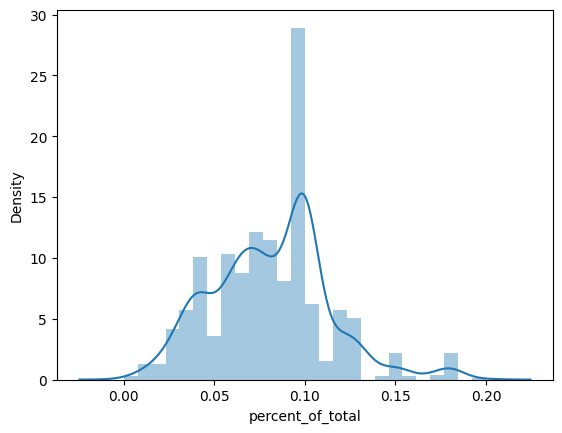

In [ ]:
sns_plot = sns.distplot(a1)
fig = sns_plot.get_figure()

<ipython-input-490-037438bdaea9>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns_plot = sns.distplot(a2)


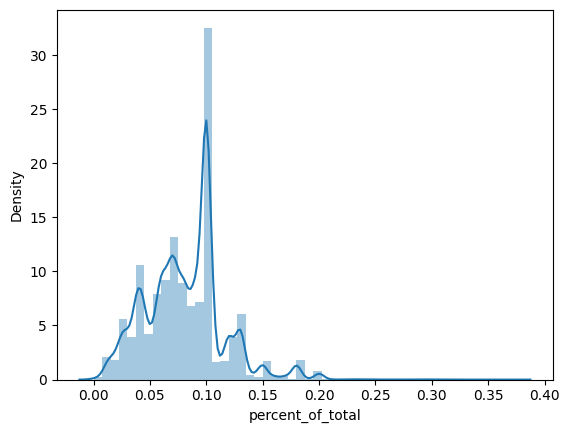

In [ ]:
sns_plot = sns.distplot(a2)
fig = sns_plot.get_figure()

<ipython-input-491-5eb756c74ae8>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns_plot = sns.distplot(a3)


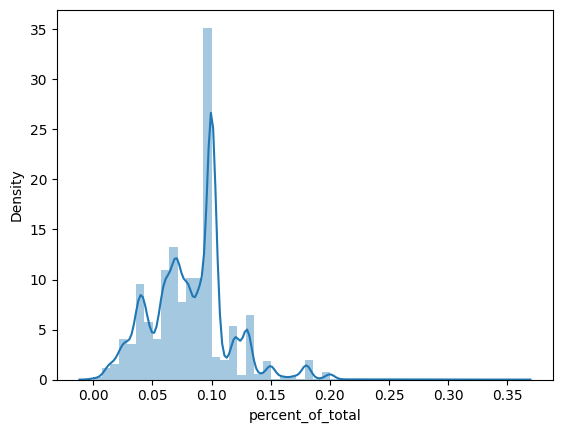

In [ ]:
sns_plot = sns.distplot(a3)
fig = sns_plot.get_figure()

<ipython-input-492-a6092403d272>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns_plot = sns.distplot(a4)


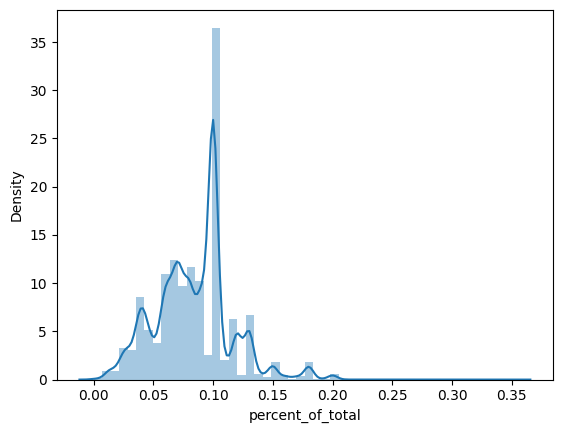

In [ ]:
sns_plot = sns.distplot(a4)
fig = sns_plot.get_figure()

In [ ]:
df['percent_of_total'] = df['amount']/df['check_sum']

In [ ]:
max(variance(a1), variance(a2), variance(a3), variance(a4))/min(variance(a1), variance(a2), variance(a3), variance(a4)) < 4

True

Принимаем гипотезу о равенстве дисперсий 

In [ ]:
welch_result_anova = oneway.anova_oneway(data = dfr['p'], groups=dfr['group'], use_var='equal', welch_correction=False, trim_frac=0) #дисперсионный тест на наличие статистически значимых отличий #дисперсионный тест на наличие статистически значимых отличий

In [ ]:
welch_result_anova.pvalue < 0.05

True

In [ ]:
result = pg.pairwise_gameshowell(dv='p', between='group', data=dfr) #апостериорный тест для выявления между какими группами есть отличия

In [ ]:
result

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,Высокий,Низкий,0.082465,0.081457,0.001007,0.001035,0.973406,1051.769952,7.646474e-01,0.029976
1,Высокий,Премиум,0.082465,0.084221,-0.001756,0.000231,-7.610992,77795.734555,0.000000e+00,-0.053024
2,Высокий,Средний,0.082465,0.081139,0.001325,0.000234,5.657097,81284.741043,9.248480e-08,0.038846
3,Низкий,Премиум,0.081457,0.084221,-0.002764,0.001038,-2.662993,1063.810106,3.925596e-02,-0.085219
4,Низкий,Средний,0.081457,0.081139,0.000318,0.001039,0.306054,1067.018312,9.900513e-01,0.009172
5,Премиум,Средний,0.084221,0.081139,0.003082,0.000247,12.477415,73891.805682,3.111544e-11,0.091611


In [ ]:
result[result['pval'] >= 0.05]

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,Высокий,Низкий,0.082465,0.081457,0.001007,0.001035,0.973406,1051.769952,0.764647,0.029976
4,Низкий,Средний,0.081457,0.081139,0.000318,0.001039,0.306054,1067.018312,0.990051,0.009172


Рассматриваем премиум сегмент отдельно 

**Санкт-Петербург. Ценовые сегменты**

In [ ]:
d_s = d8[d8['region'] == 'Санкт-Петербург']

In [ ]:
a1 = d_s[(d_s['price_segment'] == 'Низкий (<500)')]['percent_of_total']
a2 = d_s[(d_s['price_segment'] == 'Средний (>500 - <1500)')]['percent_of_total']
a3 = d_s[(d_s['price_segment'] == 'Высокий (>1500 - <2500)')]['percent_of_total']
a4 = d_s[(d_s['price_segment'] == 'Премиум (>2500)')]['percent_of_total']

In [ ]:
sns_plot = sns.distplot(a1)
fig = sns_plot.get_figure()

In [ ]:
b1 = pd.DataFrame({'p': a1, 'group': ['Низкий'] * len(a1)})
b2 = pd.DataFrame({'p': a2, 'group': ['Средний'] * len(a2)})
b3 = pd.DataFrame({'p': a3, 'group': ['Высокий'] * len(a3)})
b4 = pd.DataFrame({'p': a4, 'group': ['Премиум'] * len(a4)})

In [ ]:
dfr = pd.concat([b1, b2, b3, b4], axis = 0)

In [ ]:
sns_plot = sns.distplot(a2)
fig = sns_plot.get_figure()

In [ ]:
sns_plot = sns.distplot(a3)
fig = sns_plot.get_figure()

In [ ]:
sns_plot = sns.distplot(a4)
fig = sns_plot.get_figure()

In [ ]:
max(variance(a1), variance(a2), variance(a3), variance(a4))/min(variance(a1), variance(a2), variance(a3), variance(a4)) < 4

True

Принимаем гипотезу о равенстве дисперсий 

In [ ]:
welch_result_anova = oneway.anova_oneway(data = dfr['p'], groups=dfr['group'], use_var='equal', welch_correction=False, trim_frac=0.01) #дисперсионный тест на наличие статистически значимых отличий #дисперсионный тест на наличие статистически значимых отличий

In [ ]:
welch_result_anova.pvalue < 0.05

True

In [ ]:
result = pg.pairwise_gameshowell(dv='p', between='group', data=dfr) #апостериорный тест для выявления между какими группами есть отличия

In [ ]:
result

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,Высокий,Низкий,0.079384,0.073122,0.006262,0.001036,6.044941,1261.280380,1.178120e-08,0.184937
1,Высокий,Премиум,0.079384,0.083205,-0.003822,0.000469,-8.143120,14275.934991,1.281120e-11,-0.114460
2,Высокий,Средний,0.079384,0.075760,0.003624,0.000358,10.109470,34505.498976,4.240608e-11,0.104373
3,Низкий,Премиум,0.073122,0.083205,-0.010083,0.001071,-9.417443,1435.529715,0.000000e+00,-0.311939
4,Низкий,Средний,0.073122,0.075760,-0.002638,0.001027,-2.568691,1218.798212,5.051609e-02,-0.075001
5,Премиум,Средний,0.083205,0.075760,0.007445,0.000449,16.569633,12786.493652,5.163758e-12,0.215413


In [ ]:
result[result['pval'] >= 0.05]

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
4,Низкий,Средний,0.073122,0.07576,-0.002638,0.001027,-2.568691,1218.798212,0.050516,-0.075001


Объединяем низкий и средний сегменты

**Регионы. Ценовые сегменты**

In [ ]:
d_s = d8[d8['region'] == 'Регионы']

In [ ]:
a1 = d_s[(d_s['price_segment'] == 'Низкий (<500)')]['percent_of_total']
a2 = d_s[(d_s['price_segment'] == 'Средний (>500 - <1500)')]['percent_of_total']
a3 = d_s[(d_s['price_segment'] == 'Высокий (>1500 - <2500)')]['percent_of_total']
a4 = d_s[(d_s['price_segment'] == 'Премиум (>2500)')]['percent_of_total']

In [ ]:
sns_plot = sns.distplot(a1)
fig = sns_plot.get_figure()

In [ ]:
b1 = pd.DataFrame({'p': a1, 'group': ['Низкий'] * len(a1)})
b2 = pd.DataFrame({'p': a2, 'group': ['Средний'] * len(a2)})
b3 = pd.DataFrame({'p': a3, 'group': ['Высокий'] * len(a3)})
b4 = pd.DataFrame({'p': a4, 'group': ['Премиум'] * len(a4)})

In [ ]:
dfr = pd.concat([b1, b2, b3, b4], axis = 0)

In [ ]:
sns_plot = sns.distplot(a2)
fig = sns_plot.get_figure()

In [ ]:
sns_plot = sns.distplot(a3)
fig = sns_plot.get_figure()

In [ ]:
sns_plot = sns.distplot(a4)
fig = sns_plot.get_figure()

In [ ]:
max(variance(a1), variance(a2), variance(a3), variance(a4))/min(variance(a1), variance(a2), variance(a3), variance(a4)) < 4

True

Принимаем гипотезу о равенстве дисперсий 

In [ ]:
welch_result_anova = oneway.anova_oneway(data = dfr['p'], groups=dfr['group'], use_var='equal', welch_correction=False, trim_frac=0.05) #дисперсионный тест на наличие статистически значимых отличий #дисперсионный тест на наличие статистически значимых отличий

In [ ]:
welch_result_anova.pvalue < 0.05

True

In [ ]:
result = pg.pairwise_gameshowell(dv='p', between='group', data=dfr) #апостериорный тест для выявления между какими группами есть отличия

In [ ]:
result

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,Высокий,Низкий,0.077982,0.076032,0.001950,0.000936,2.082889,1720.143351,1.590708e-01,0.055170
1,Высокий,Премиум,0.077982,0.080511,-0.002529,0.000438,-5.770310,14387.960451,4.838745e-08,-0.072184
2,Высокий,Средний,0.077982,0.075198,0.002784,0.000261,10.665409,44449.071572,8.709589e-12,0.077241
3,Низкий,Премиум,0.076032,0.080511,-0.004479,0.000984,-4.551237,2090.260535,3.339472e-05,-0.130297
4,Низкий,Средний,0.076032,0.075198,0.000834,0.000919,0.907263,1598.018002,8.009825e-01,0.022991
5,Премиум,Средний,0.080511,0.075198,0.005313,0.000400,13.267257,10409.542389,0.000000e+00,0.147300


In [ ]:
result[result['pval'] >= 0.05]

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,Высокий,Низкий,0.077982,0.076032,0.001950,0.000936,2.082889,1720.143351,0.159071,0.055170
4,Низкий,Средний,0.076032,0.075198,0.000834,0.000919,0.907263,1598.018002,0.800982,0.022991


Объединяем низкий и средний сегменты, но требуется дополнительная проверка на симуляции

**Диапазон 9 (9000-14900)**

In [ ]:
d9 = df[(df['check_sum'] <= 14900) & (df['check_sum'] > 9000)].copy().reset_index() #выделили рассматриваемый диапазон

In [ ]:
d9 = d9[d9['amount'] <= np.quantile(d9['amount'], 0.999)] #избавились от выбросов в чаевых

In [ ]:
d9 = d9[d9['amount'] > 0] #избавились от ошибок 

In [ ]:
d9['percent_of_total'] = d9['amount']/d9['check_sum']

Москва, Санкт-Перербург, Регионы

In [ ]:
a1 = d9[d9['region'] == 'Москва']['percent_of_total']
a2 = d9[d9['region'] == 'Санкт-Петербург']['percent_of_total']
a3 = d9[d9['region'] == 'Регионы']['percent_of_total']

In [ ]:
b1 = pd.DataFrame({'p': a1, 'group': ['Москва'] * len(a1)})
b2 = pd.DataFrame({'p': a2, 'group': ['Санкт-Петербург'] * len(a2)})
b3 = pd.DataFrame({'p': a3, 'group': ['Регионы'] * len(a3)})

In [ ]:
sns_plot = sns.distplot(a1)
fig = sns_plot.get_figure()

In [ ]:
sns_plot = sns.distplot(a2)
fig = sns_plot.get_figure()

In [ ]:
sns_plot = sns.distplot(a3)
fig = sns_plot.get_figure()

Распределение имеет явный пик в 10% и сильно смещено влево 



In [ ]:
max(variance(a1), variance(a2), variance(a3))/min(variance(a1), variance(a2), variance(a3)) < 4

True

Принимаем гипотезу о равенстве дисперсий

In [ ]:
dfr = pd.concat([b1, b2, b3], axis = 0)

In [ ]:
welch_result_anova = oneway.anova_oneway(data = dfr['p'], groups=dfr['group'], use_var='equal', welch_correction=False, trim_frac=0.01) #дисперсионный тест на наличие статистически значимых отличий #дисперсионный тест на наличие статистически значимых отличий

In [ ]:
welch_result_anova.pvalue < 0.05

True

In [ ]:
result = pg.pairwise_gameshowell(dv='p', between='group', data=dfr) #апостериорный тест для выявления между какими группами есть отличия

In [ ]:
result

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,Москва,Регионы,0.079826,0.071670,0.008156,0.000179,45.584990,153948.473897,0.0,0.225906
1,Москва,Санкт-Петербург,0.079826,0.075594,0.004232,0.000232,18.221501,53082.771606,0.0,0.119847
2,Регионы,Санкт-Петербург,0.071670,0.075594,-0.003924,0.000244,-16.078959,61424.967716,0.0,-0.106592


In [ ]:
result[result['pval'] >= 0.05]

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges


Все регионы должны рассматриваться отдельно 

**Москва. Ценовые сегменты**

In [ ]:
d_m = d9[d9['region'] == 'Москва']

In [ ]:
a1 = d_m[(d_m['price_segment'] == 'Низкий (<500)')]['percent_of_total']
a2 = d_m[(d_m['price_segment'] == 'Средний (>500 - <1500)')]['percent_of_total']
a3 = d_m[(d_m['price_segment'] == 'Высокий (>1500 - <2500)')]['percent_of_total']
a4 = d_m[(d_m['price_segment'] == 'Премиум (>2500)')]['percent_of_total']

In [ ]:
b1 = pd.DataFrame({'p': a1, 'group': ['Низкий'] * len(a1)})
b2 = pd.DataFrame({'p': a2, 'group': ['Средний'] * len(a2)})
b3 = pd.DataFrame({'p': a3, 'group': ['Высокий'] * len(a3)})
b4 = pd.DataFrame({'p': a4, 'group': ['Премиум'] * len(a4)})

In [ ]:
dfr = pd.concat([b1, b2, b3, b4], axis = 0)

In [ ]:
sns_plot = sns.distplot(a1)
fig = sns_plot.get_figure()

In [ ]:
sns_plot = sns.distplot(a2)
fig = sns_plot.get_figure()

In [ ]:
sns_plot = sns.distplot(a3)
fig = sns_plot.get_figure()

In [ ]:
sns_plot = sns.distplot(a4)
fig = sns_plot.get_figure()

In [ ]:
max(variance(a1), variance(a2), variance(a3), variance(a4))/min(variance(a1), variance(a2), variance(a3), variance(a4)) < 4

True

Принимаем гипотезу о равенстве дисперсий 

In [ ]:
welch_result_anova = oneway.anova_oneway(data = dfr['p'], groups=dfr['group'], use_var='equal', welch_correction=False, trim_frac=0.01) #дисперсионный тест на наличие статистически значимых отличий #дисперсионный тест на наличие статистически значимых отличий

In [ ]:
welch_result_anova.pvalue < 0.05

True

In [ ]:
result = pg.pairwise_gameshowell(dv='p', between='group', data=dfr) #апостериорный тест для выявления между какими группами есть отличия

In [ ]:
result

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,Высокий,Низкий,0.078971,0.076922,0.002049,0.001668,1.227892,527.358762,6.093670e-01,0.057828
1,Высокий,Премиум,0.078971,0.082143,-0.003172,0.000270,-11.743143,65413.196620,0.000000e+00,-0.091354
2,Высокий,Средний,0.078971,0.078372,0.000599,0.000289,2.074656,57906.671958,1.614131e-01,0.016783
3,Низкий,Премиум,0.076922,0.082143,-0.005221,0.001669,-3.128099,528.116446,1.000316e-02,-0.153535
4,Низкий,Средний,0.076922,0.078372,-0.001450,0.001672,-0.867052,532.043350,8.218657e-01,-0.040185
5,Премиум,Средний,0.082143,0.078372,0.003771,0.000292,12.910828,56020.328919,5.335610e-11,0.107913


In [ ]:
result[result['pval'] >= 0.05]

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,Высокий,Низкий,0.078971,0.076922,0.002049,0.001668,1.227892,527.358762,0.609367,0.057828
2,Высокий,Средний,0.078971,0.078372,0.000599,0.000289,2.074656,57906.671958,0.161413,0.016783
4,Низкий,Средний,0.076922,0.078372,-0.001450,0.001672,-0.867052,532.043350,0.821866,-0.040185


Рассматриваем премиум сегмент отдельно 

**Санкт-Петербург. Ценовые сегменты**

In [ ]:
d_s = d9[d9['region'] == 'Санкт-Петербург']

In [ ]:
a1 = d_s[(d_s['price_segment'] == 'Низкий (<500)')]['percent_of_total']
a2 = d_s[(d_s['price_segment'] == 'Средний (>500 - <1500)')]['percent_of_total']
a3 = d_s[(d_s['price_segment'] == 'Высокий (>1500 - <2500)')]['percent_of_total']
a4 = d_s[(d_s['price_segment'] == 'Премиум (>2500)')]['percent_of_total']

In [ ]:
sns_plot = sns.distplot(a1)
fig = sns_plot.get_figure()

In [ ]:
b1 = pd.DataFrame({'p': a1, 'group': ['Низкий'] * len(a1)})
b2 = pd.DataFrame({'p': a2, 'group': ['Средний'] * len(a2)})
b3 = pd.DataFrame({'p': a3, 'group': ['Высокий'] * len(a3)})
b4 = pd.DataFrame({'p': a4, 'group': ['Премиум'] * len(a4)})

In [ ]:
dfr = pd.concat([b1, b2, b3, b4], axis = 0)

In [ ]:
sns_plot = sns.distplot(a2)
fig = sns_plot.get_figure()

In [ ]:
sns_plot = sns.distplot(a3)
fig = sns_plot.get_figure()

In [ ]:
sns_plot = sns.distplot(a4)
fig = sns_plot.get_figure()

In [ ]:
max(variance(a1), variance(a2), variance(a3), variance(a4))/min(variance(a1), variance(a2), variance(a3), variance(a4)) < 4

True

Принимаем гипотезу о равенстве дисперсий 

In [ ]:
welch_result_anova = oneway.anova_oneway(data = dfr['p'], groups=dfr['group'], use_var='equal', welch_correction=False, trim_frac=0.01) #дисперсионный тест на наличие статистически значимых отличий #дисперсионный тест на наличие статистически значимых отличий

In [ ]:
welch_result_anova.pvalue < 0.05

True

In [ ]:
result = pg.pairwise_gameshowell(dv='p', between='group', data=dfr) #апостериорный тест для выявления между какими группами есть отличия

In [ ]:
result

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,Высокий,Низкий,0.077013,0.068414,0.008598,0.001314,6.541308,881.571767,6.193486e-10,0.249159
1,Высокий,Премиум,0.077013,0.080664,-0.003651,0.000546,-6.682206,12454.380717,1.412993e-10,-0.107036
2,Высокий,Средний,0.077013,0.072700,0.004313,0.000459,9.405504,24057.900878,1.200762e-11,0.119503
3,Низкий,Премиум,0.068414,0.080664,-0.012250,0.001345,-9.109643,964.067127,5.264678e-13,-0.363186
4,Низкий,Средний,0.068414,0.072700,-0.004286,0.001311,-3.268113,873.529176,6.178366e-03,-0.115108
5,Премиум,Средний,0.080664,0.072700,0.007964,0.000539,14.773399,12408.940516,4.564127e-12,0.219855


In [ ]:
result[result['pval'] >= 0.05]

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges


Все сегменты рассматриваем отдельно 

**Регионы. Ценовые сегменты**

In [ ]:
d_s = d9[d9['region'] == 'Регионы']

In [ ]:
a1 = d_s[(d_s['price_segment'] == 'Низкий (<500)')]['percent_of_total']
a2 = d_s[(d_s['price_segment'] == 'Средний (>500 - <1500)')]['percent_of_total']
a3 = d_s[(d_s['price_segment'] == 'Высокий (>1500 - <2500)')]['percent_of_total']
a4 = d_s[(d_s['price_segment'] == 'Премиум (>2500)')]['percent_of_total']

In [ ]:
sns_plot = sns.distplot(a1)
fig = sns_plot.get_figure()

In [ ]:
b1 = pd.DataFrame({'p': a1, 'group': ['Низкий'] * len(a1)})
b2 = pd.DataFrame({'p': a2, 'group': ['Средний'] * len(a2)})
b3 = pd.DataFrame({'p': a3, 'group': ['Высокий'] * len(a3)})
b4 = pd.DataFrame({'p': a4, 'group': ['Премиум'] * len(a4)})

In [ ]:
dfr = pd.concat([b1, b2, b3, b4], axis = 0)

In [ ]:
sns_plot = sns.distplot(a2)
fig = sns_plot.get_figure()

In [ ]:
sns_plot = sns.distplot(a3)
fig = sns_plot.get_figure()

In [ ]:
sns_plot = sns.distplot(a4)
fig = sns_plot.get_figure()

In [ ]:
max(variance(a1), variance(a2), variance(a3), variance(a4))/min(variance(a1), variance(a2), variance(a3), variance(a4)) < 4

True

Принимаем гипотезу о равенстве дисперсий 

In [ ]:
welch_result_anova = oneway.anova_oneway(data = dfr['p'], groups=dfr['group'], use_var='equal', welch_correction=False, trim_frac=0.05) #дисперсионный тест на наличие статистически значимых отличий #дисперсионный тест на наличие статистически значимых отличий

In [ ]:
welch_result_anova.pvalue < 0.05

True

In [ ]:
result = pg.pairwise_gameshowell(dv='p', between='group', data=dfr) #апостериорный тест для выявления между какими группами есть отличия

In [ ]:
result

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,Высокий,Низкий,0.073966,0.071356,0.002610,0.001208,2.161347,1165.078920,1.347725e-01,0.070472
1,Высокий,Премиум,0.073966,0.077715,-0.003749,0.000527,-7.108474,11526.608501,2.727241e-11,-0.102547
2,Высокий,Средний,0.073966,0.070093,0.003873,0.000328,11.827060,30871.923713,0.000000e+00,0.103741
3,Низкий,Премиум,0.071356,0.077715,-0.006359,0.001257,-5.059957,1361.530662,2.843659e-06,-0.177993
4,Низкий,Средний,0.071356,0.070093,0.001263,0.001187,1.064119,1086.644821,7.114791e-01,0.033705
5,Премиум,Средний,0.077715,0.070093,0.007622,0.000478,15.961633,8161.513706,5.566547e-12,0.204750


In [ ]:
result[result['pval'] >= 0.05]

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,Высокий,Низкий,0.073966,0.071356,0.002610,0.001208,2.161347,1165.078920,0.134773,0.070472
4,Низкий,Средний,0.071356,0.070093,0.001263,0.001187,1.064119,1086.644821,0.711479,0.033705


Объединяем низкий и средний сегменты, но требуется дополнительная проверка на симуляции

**Диапазон 10(14900-...)**

In [ ]:
d10 = df[(df['check_sum'] <= np.quantile(df['check_sum'], 0.999)) & (df['check_sum'] > 14900)].copy().reset_index() #выделили рассматриваемый диапазон

In [ ]:
d10 = d10[d10['amount'] <= np.quantile(d10['amount'], 0.999)] #избавились от выбросов в чаевых

In [ ]:
d10 = d10[d10['amount'] > 0] #избавились от ошибок 

In [ ]:
d10['percent_of_total'] = d10['amount']/d10['check_sum']

Москва, Санкт-Перербург, Регионы

In [ ]:
a1 = d10[d10['region'] == 'Москва']['percent_of_total']
a2 = d10[d10['region'] == 'Санкт-Петербург']['percent_of_total']
a3 = d10[d10['region'] == 'Регионы']['percent_of_total']

In [ ]:
b1 = pd.DataFrame({'p': a1, 'group': ['Москва'] * len(a1)})
b2 = pd.DataFrame({'p': a2, 'group': ['Санкт-Петербург'] * len(a2)})
b3 = pd.DataFrame({'p': a3, 'group': ['Регионы'] * len(a3)})

In [ ]:
sns_plot = sns.distplot(a1)
fig = sns_plot.get_figure()

In [ ]:
sns_plot = sns.distplot(a2)
fig = sns_plot.get_figure()

In [ ]:
sns_plot = sns.distplot(a3)
fig = sns_plot.get_figure()

Распределение имеет явный пик в 10% и сильно смещено влево 



In [ ]:
max(variance(a1), variance(a2), variance(a3))/min(variance(a1), variance(a2), variance(a3)) < 4

True

Принимаем гипотезу о равенстве дисперсий

In [ ]:
dfr = pd.concat([b1, b2, b3], axis = 0)

In [ ]:
welch_result_anova = oneway.anova_oneway(data = dfr['p'], groups=dfr['group'], use_var='equal', welch_correction=False, trim_frac=0.05) #дисперсионный тест на наличие статистически значимых отличий #дисперсионный тест на наличие статистически значимых отличий

In [ ]:
welch_result_anova.pvalue < 0.05

True

In [ ]:
result = pg.pairwise_gameshowell(dv='p', between='group', data=dfr) #апостериорный тест для выявления между какими группами есть отличия

In [ ]:
result

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,Москва,Регионы,0.078463,0.068093,0.010370,0.000287,36.163179,63846.591948,0.000000e+00,0.271215
1,Москва,Санкт-Петербург,0.078463,0.075125,0.003338,0.000378,8.824483,19932.480779,1.776812e-11,0.090065
2,Регионы,Санкт-Петербург,0.068093,0.075125,-0.007032,0.000404,-17.405989,24469.632103,0.000000e+00,-0.179152


In [ ]:
result[result['pval'] >= 0.05]

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges


Все регионы должны рассматриваться отдельно 

**Москва. Ценовые сегменты**

In [ ]:
d_m = d10[d10['region'] == 'Москва']

In [ ]:
a1 = d_m[(d_m['price_segment'] == 'Низкий (<500)')]['percent_of_total']
a2 = d_m[(d_m['price_segment'] == 'Средний (>500 - <1500)')]['percent_of_total']
a3 = d_m[(d_m['price_segment'] == 'Высокий (>1500 - <2500)')]['percent_of_total']
a4 = d_m[(d_m['price_segment'] == 'Премиум (>2500)')]['percent_of_total']

In [ ]:
b1 = pd.DataFrame({'p': a1, 'group': ['Низкий'] * len(a1)})
b2 = pd.DataFrame({'p': a2, 'group': ['Средний'] * len(a2)})
b3 = pd.DataFrame({'p': a3, 'group': ['Высокий'] * len(a3)})
b4 = pd.DataFrame({'p': a4, 'group': ['Премиум'] * len(a4)})

In [ ]:
dfr = pd.concat([b1, b2, b3, b4], axis = 0)

In [ ]:
sns_plot = sns.distplot(a1)
fig = sns_plot.get_figure()

In [ ]:
sns_plot = sns.distplot(a2)
fig = sns_plot.get_figure()

In [ ]:
sns_plot = sns.distplot(a3)
fig = sns_plot.get_figure()

In [ ]:
sns_plot = sns.distplot(a4)
fig = sns_plot.get_figure()

In [ ]:
max(variance(a1), variance(a2), variance(a3), variance(a4))/min(variance(a1), variance(a2), variance(a3), variance(a4)) < 4

True

Принимаем гипотезу о равенстве дисперсий 

In [ ]:
welch_result_anova = oneway.anova_oneway(data = dfr['p'], groups=dfr['group'], use_var='equal', welch_correction=False, trim_frac=0.01) #дисперсионный тест на наличие статистически значимых отличий #дисперсионный тест на наличие статистически значимых отличий

In [ ]:
welch_result_anova.pvalue < 0.05

True

In [ ]:
result = pg.pairwise_gameshowell(dv='p', between='group', data=dfr) #апостериорный тест для выявления между какими группами есть отличия

In [ ]:
result

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,Высокий,Низкий,0.077896,0.070198,0.007697,0.002841,2.709826,180.795887,3.675560e-02,0.208970
1,Высокий,Премиум,0.077896,0.080332,-0.002436,0.000401,-6.082602,32623.957947,7.160893e-09,-0.067151
2,Высокий,Средний,0.077896,0.076517,0.001378,0.000472,2.920812,22681.002141,1.835313e-02,0.036630
3,Низкий,Премиум,0.070198,0.080332,-0.010134,0.002839,-3.569709,180.353357,2.563136e-03,-0.283174
4,Низкий,Средний,0.070198,0.076517,-0.006319,0.002850,-2.217349,183.152081,1.223731e-01,-0.163011
5,Премиум,Средний,0.080332,0.076517,0.003815,0.000461,8.268586,21936.202971,1.044465e-11,0.103175


In [ ]:
result[result['pval'] >= 0.05]

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
4,Низкий,Средний,0.070198,0.076517,-0.006319,0.00285,-2.217349,183.152081,0.122373,-0.163011


Рассматриваем премиум сегмент отдельно 

**Санкт-Петербург. Ценовые сегменты**

In [ ]:
d_s = d10[d10['region'] == 'Санкт-Петербург']

In [ ]:
a1 = d_s[(d_s['price_segment'] == 'Низкий (<500)')]['percent_of_total']
a2 = d_s[(d_s['price_segment'] == 'Средний (>500 - <1500)')]['percent_of_total']
a3 = d_s[(d_s['price_segment'] == 'Высокий (>1500 - <2500)')]['percent_of_total']
a4 = d_s[(d_s['price_segment'] == 'Премиум (>2500)')]['percent_of_total']

In [ ]:
sns_plot = sns.distplot(a1)
fig = sns_plot.get_figure()

In [ ]:
b1 = pd.DataFrame({'p': a1, 'group': ['Низкий'] * len(a1)})
b2 = pd.DataFrame({'p': a2, 'group': ['Средний'] * len(a2)})
b3 = pd.DataFrame({'p': a3, 'group': ['Высокий'] * len(a3)})
b4 = pd.DataFrame({'p': a4, 'group': ['Премиум'] * len(a4)})

In [ ]:
dfr = pd.concat([b1, b2, b3, b4], axis = 0)

In [ ]:
sns_plot = sns.distplot(a2)
fig = sns_plot.get_figure()

In [ ]:
sns_plot = sns.distplot(a3)
fig = sns_plot.get_figure()

In [ ]:
sns_plot = sns.distplot(a4)
fig = sns_plot.get_figure()

In [ ]:
max(variance(a1), variance(a2), variance(a3), variance(a4))/min(variance(a1), variance(a2), variance(a3), variance(a4)) < 4

True

Принимаем гипотезу о равенстве дисперсий 

In [ ]:
welch_result_anova = oneway.anova_oneway(data = dfr['p'], groups=dfr['group'], use_var='equal', welch_correction=False, trim_frac=0.01) #дисперсионный тест на наличие статистически значимых отличий #дисперсионный тест на наличие статистически значимых отличий

In [ ]:
welch_result_anova.pvalue < 0.05

True

In [ ]:
result = pg.pairwise_gameshowell(dv='p', between='group', data=dfr) #апостериорный тест для выявления между какими группами есть отличия

In [ ]:
result

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,Высокий,Низкий,0.075597,0.070781,0.004815,0.002160,2.229382,292.059471,1.177483e-01,0.134314
1,Высокий,Премиум,0.075597,0.078611,-0.003014,0.000827,-3.643284,6968.141680,1.545130e-03,-0.083554
2,Высокий,Средний,0.075597,0.072297,0.003300,0.000800,4.123455,8785.968002,2.203618e-04,0.087262
3,Низкий,Премиум,0.070781,0.078611,-0.007830,0.002188,-3.578180,307.464847,2.262227e-03,-0.217175
4,Низкий,Средний,0.070781,0.072297,-0.001515,0.002178,-0.695744,301.924907,8.986709e-01,-0.038494
5,Премиум,Средний,0.078611,0.072297,0.006314,0.000874,7.228601,7312.403867,1.027178e-12,0.165112


In [ ]:
result[result['pval'] >= 0.05]

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,Высокий,Низкий,0.075597,0.070781,0.004815,0.002160,2.229382,292.059471,0.117748,0.134314
4,Низкий,Средний,0.070781,0.072297,-0.001515,0.002178,-0.695744,301.924907,0.898671,-0.038494


 Вместе рассматриваем Низкий и Средний сегменты, остальные отдельно. Необходима дополнительная проверка на симуляции

**Регионы. Ценовые сегменты**

In [ ]:
d_s = d10[d10['region'] == 'Регионы']

In [ ]:
len(d_s)

31198

In [ ]:
a1 = d_s[(d_s['price_segment'] == 'Низкий (<500)')]['percent_of_total']
a2 = d_s[(d_s['price_segment'] == 'Средний (>500 - <1500)')]['percent_of_total']
a3 = d_s[(d_s['price_segment'] == 'Высокий (>1500 - <2500)')]['percent_of_total']
a4 = d_s[(d_s['price_segment'] == 'Премиум (>2500)')]['percent_of_total']

In [ ]:
sns_plot = sns.distplot(a1)
fig = sns_plot.get_figure()

In [ ]:
b1 = pd.DataFrame({'p': a1, 'group': ['Низкий'] * len(a1)})
b2 = pd.DataFrame({'p': a2, 'group': ['Средний'] * len(a2)})
b3 = pd.DataFrame({'p': a3, 'group': ['Высокий'] * len(a3)})
b4 = pd.DataFrame({'p': a4, 'group': ['Премиум'] * len(a4)})

In [ ]:
dfr = pd.concat([b1, b2, b3, b4], axis = 0)

In [ ]:
sns_plot = sns.distplot(a2)
fig = sns_plot.get_figure()

In [ ]:
sns_plot = sns.distplot(a3)
fig = sns_plot.get_figure()

In [ ]:
sns_plot = sns.distplot(a4)
fig = sns_plot.get_figure()

In [ ]:
max(variance(a1), variance(a2), variance(a3), variance(a4))/min(variance(a1), variance(a2), variance(a3), variance(a4)) < 4

True

Принимаем гипотезу о равенстве дисперсий 

In [ ]:
welch_result_anova = oneway.anova_oneway(data = dfr['p'], groups=dfr['group'], use_var='equal', welch_correction=False, trim_frac=0.05) #дисперсионный тест на наличие статистически значимых отличий #дисперсионный тест на наличие статистически значимых отличий

In [ ]:
welch_result_anova.pvalue < 0.05 

True

In [ ]:
result = pg.pairwise_gameshowell(dv='p', between='group', data=dfr) #апостериорный тест для выявления между какими группами есть отличия

In [ ]:
result

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,Высокий,Низкий,0.069794,0.065876,0.003919,0.001857,2.110206,417.504059,1.515020e-01,0.102686
1,Высокий,Премиум,0.069794,0.076234,-0.006440,0.000782,-8.235851,6733.964697,0.000000e+00,-0.168533
2,Высокий,Средний,0.069794,0.066062,0.003732,0.000527,7.081253,14543.985438,7.912115e-12,0.093002
3,Низкий,Премиум,0.065876,0.076234,-0.010359,0.001916,-5.405306,472.805307,6.145034e-07,-0.274785
4,Низкий,Средний,0.065876,0.066062,-0.000187,0.001827,-0.102239,391.468244,9.996169e-01,-0.004590
5,Премиум,Средний,0.076234,0.066062,0.010172,0.000708,14.357382,4946.509728,1.622813e-12,0.251820


In [ ]:
result[result['pval'] >= 0.05]

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,Высокий,Низкий,0.069794,0.065876,0.003919,0.001857,2.110206,417.504059,0.151502,0.102686
4,Низкий,Средний,0.065876,0.066062,-0.000187,0.001827,-0.102239,391.468244,0.999617,-0.004590


Объединяем низкий и средний сегменты, но требуется дополнительная проверка на симуляции